In [422]:
#import libraries

%matplotlib inline
# Numerical libraries
import numpy as np  

# to handle data in form of rows and columns 
import pandas as pd  

# preprocessing
from sklearn.preprocessing import StandardScaler


#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split

# calculate accuracy measures and confusion matrix
from sklearn import metrics  

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

# Label encoder 
from sklearn.preprocessing import LabelEncoder

# Support Vector Classifier
from sklearn.svm import SVC

# PCA Related
from sklearn.decomposition import PCA

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score, confusion_matrix

# Cross Validation related
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score



In [423]:
#Loading DataSets

df = pd.read_csv('vehicle.csv')
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

### EDA

In [424]:
rows_count,columns_count = df.shape
print('Total number of rows: ',rows_count)
print('Total number of column: ',columns_count)

Total number of rows:  846
Total number of column:  19


#### Datatype of each attribute

In [425]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

#### Here all the variables are numerical except 'class' column and there are null values in some columns.'Class' is out target column.

In [426]:
#display in each column how many null values are there

df.apply(lambda x: sum(x.isnull()))

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [427]:
#display 5 point summary of data frame

df.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [428]:
#Explore distribution of vehicle of each class
df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [429]:
#Label encode the target class
labelencoder = LabelEncoder()
df['class'] = labelencoder.fit_transform(df['class'])
df['class'].value_counts()

1    429
0    218
2    199
Name: class, dtype: int64

#### Cars are almost double in number than bus and van.van is least in number

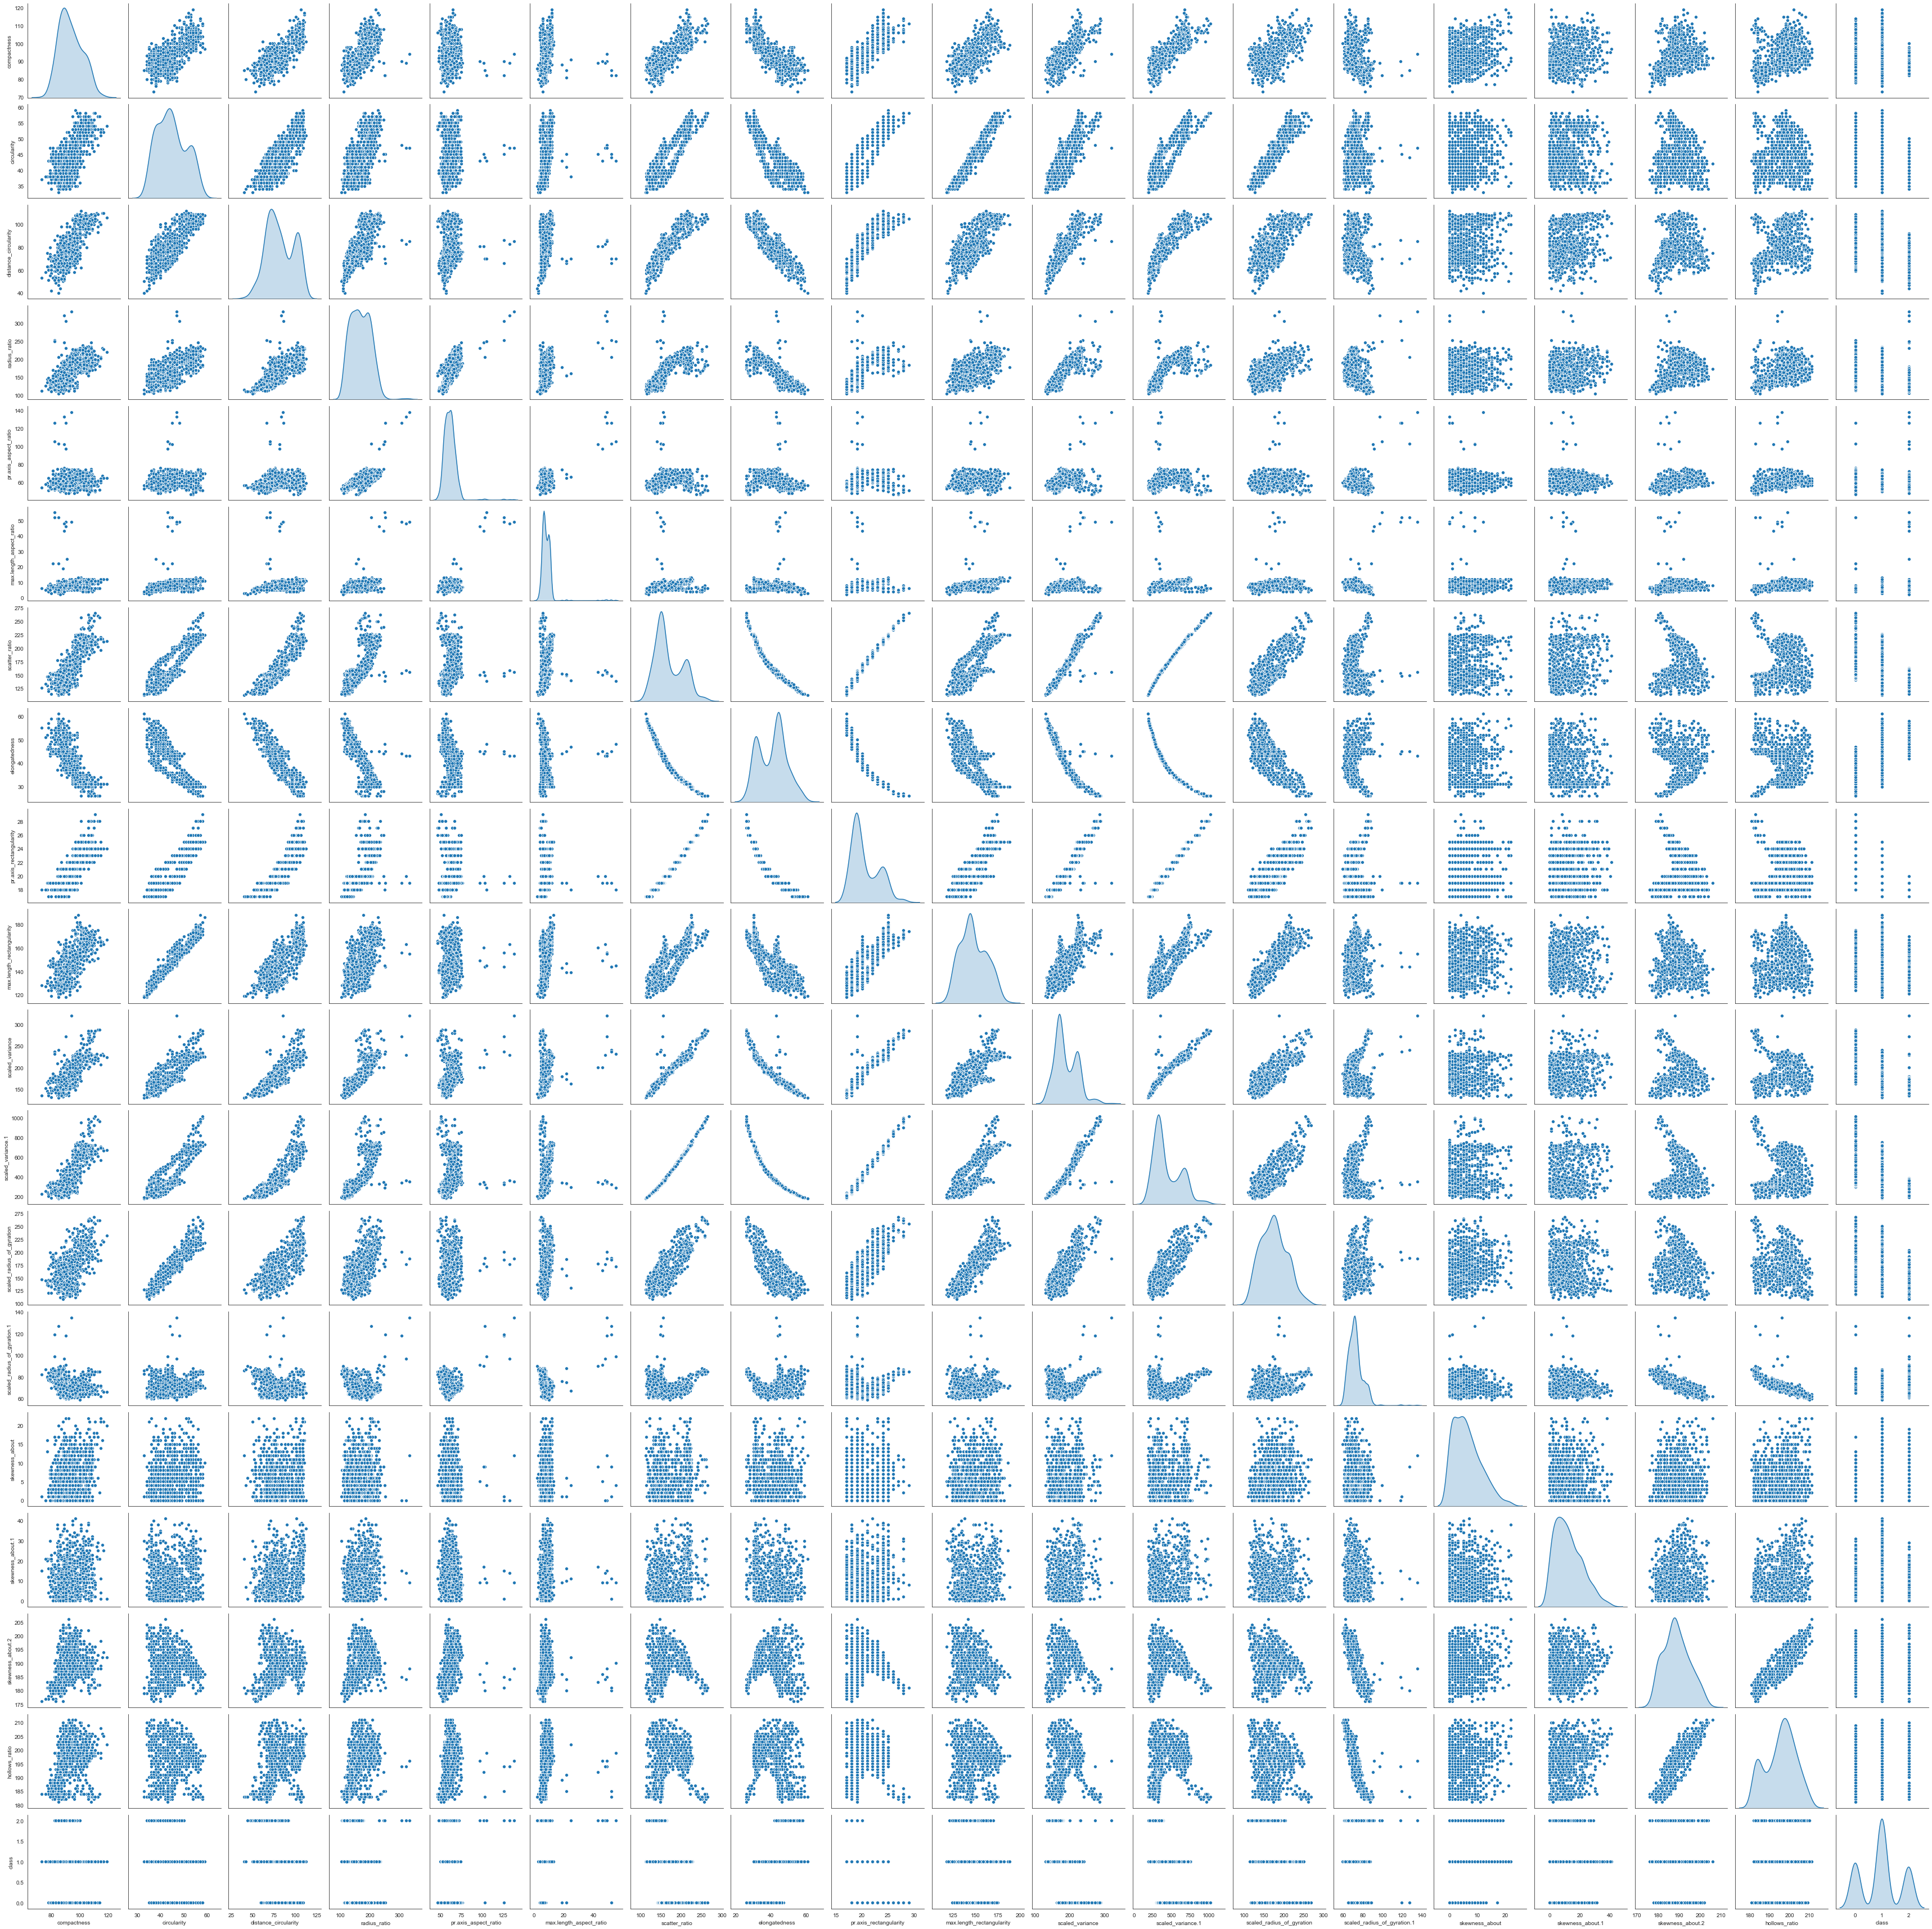

In [430]:
sns.pairplot(df,diag_kind='kde')
plt.show()

#### Correlation & Heatmap


In [431]:
df.corr()

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.689786              0.791707   
circularity                     0.689786     1.000000              0.797180   
distance_circularity            0.791707     0.797180              1.000000   
radius_ratio                    0.691081     0.625051              0.771748   
pr.axis_aspect_ratio            0.091779     0.154283              0.158684   
max.length_aspect_ratio         0.148249     0.251407              0.264621   
scatter_ratio                   0.812770     0.858265              0.907949   
elongatedness                  -0.788736    -0.827246             -0.913020   
pr.axis_rectangularity          0.814248     0.856603              0.896273   
max.length_rectangularity       0.676143     0.965729              0.775149   
scaled_variance                 0.764361     0.806791              0.865710   
scaled_variance.1               0.818674     0.850863              0.890541   
scaled_radius_of_gyration       0.585845     0.935950              0.706950   
scaled_radius_of_gyration.1    -0.250603     0.053080             -0.227001   
skewness_about                  0.236685     0.144968              0.114665   
skewness_about.1                0.157670    -0.011869              0.266049   
skewness_about.2                0.298528    -0.106339              0.146027   
hollows_ratio                   0.365552     0.045652              0.333648   
class                          -0.033796    -0.160546             -0.065209   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.691081              0.091779   
circularity                      0.625051              0.154283   
distance_circularity             0.771748              0.158684   
radius_ratio                     1.000000              0.665363   
pr.axis_aspect_ratio             0.665363              1.000000   
max.length_aspect_ratio          0.450486              0.648861   
scatter_ratio                    0.738480              0.103832   
elongatedness                   -0.792946             -0.183492   
pr.axis_rectangularity           0.712744              0.079566   
max.length_rectangularity        0.571083              0.127322   
scaled_variance                  0.798294              0.273738   
scaled_variance.1                0.725598              0.089750   
scaled_radius_of_gyration        0.541325              0.122454   
scaled_radius_of_gyration.1     -0.181520              0.152860   
skewness_about                   0.049112             -0.058539   
skewness_about.1                 0.174469             -0.032180   
skewness_about.2                 0.382912              0.240201   
hollows_ratio                    0.472339              0.267760   
class                           -0.182921             -0.098431   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.148249       0.812770   
circularity                                 0.251407       0.858265   
distance_circularity                        0.264621       0.907949   
radius_ratio                                0.450486       0.738480   
pr.axis_aspect_ratio                        0.648861       0.103832   
max.length_aspect_ratio                     1.000000       0.165998   
scatter_ratio                               0.165998       1.000000   
elongatedness                              -0.180053      -0.973504   
pr.axis_rectangularity                      0.161603       0.992078   
max.length_rectangularity                   0.305943       0.810017   
scaled_variance                             0.319033       0.951672   
scaled_variance.1                           0.143745       0.996328   
scaled_radius_of_gyration                   0.189752       0.800577   
scaled_radius_of_gyration.1                 0.295638      -0.028006   
skewness_about                            

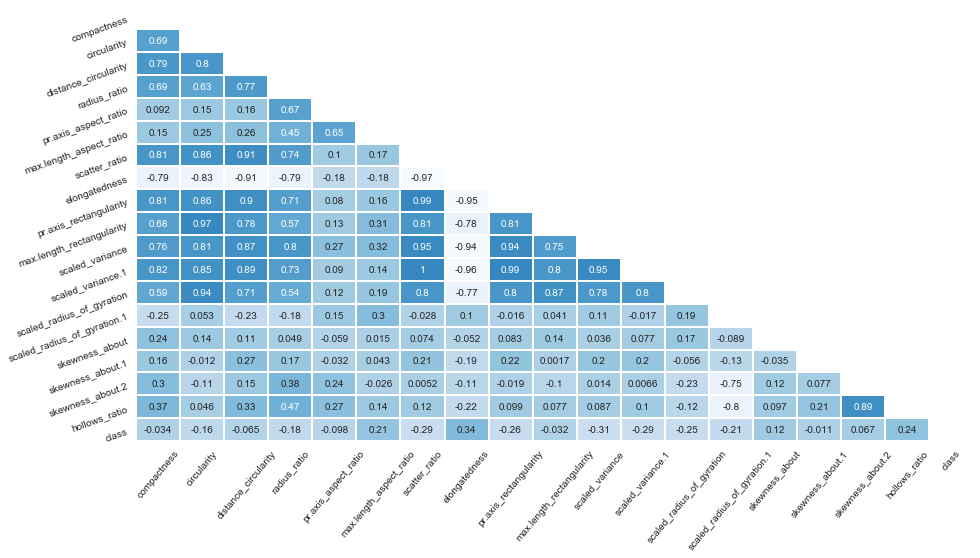

In [432]:
#Correlation Matrix
corr = df.corr() 
lower_triangle = np.tril(corr, k = -1)
mask = lower_triangle == 0 

plt.figure(figsize = (15,8)) 
sns.set_style(style = 'white') 
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)
plt.xticks(rotation = 50) 
plt.yticks(rotation = 20) 
plt.show()

#### Inference from heat map:

From above correlation matrix we can see that there are many features which are highly correlated. if we see carefully then scaled_variance.1 and scatter_ratio has correlation of 1 and many other features are also there which having more than 0.9(positive or negative) correlation e.g sekweness_abou2 and hollows_ratio, scaled variance & scaled_variance1, elongatedness & scaled variance, elongatedness & scaled variance1 etc.

There are lot of dimensions with correlation above +- 0.7 and it is difficult to determine which dimensions to drop manually. We will use PCA to determine it.

In [433]:
df.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   
class                        846.0    0.977541    0.702130    0.0    0.00   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0  
class                          1.0    1.0     2.0

From above table it is clear that there are missing values in many columns-circularity,distance_circularity,radius_ratio scatter_ratio,elongatedness,pr.axis_rectangularity,scaled_variance,scaled_variance,scaled_radius_of_gyration,scaled_radius_of_gyration.1 skewness_about,skewness_about.skewness_about.2

In [434]:
#Columns having missing values
missing_values_cols=df.columns[df.isnull().any()]
# Number of missing values in each column
df[missing_values_cols].isnull().sum()

circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
dtype: int64

In [435]:
#List all the rows having missing value in any of the single or multiple columns

df[df.isnull().any(axis=1)][missing_values_cols].head()

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
5           NaN                 106.0         172.0                  50.0   
9          44.0                  98.0           NaN                  62.0   
19         56.0                 100.0         215.0                   NaN   
35         46.0                   NaN         172.0                  67.0   
66         43.0                  68.0         125.0                  57.0   

    scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
5           255.0           26.0                    28.0            280.0   
9           183.0           36.0                    22.0            202.0   
19          208.0           32.0                    24.0            227.0   
35          157.0           43.0                    20.0            170.0   
66          149.0           46.0                    19.0            169.0   

    scaled_variance.1  scaled_radius_of_gyration  scaled_radius_of_gyration.1  \
5               957.0                      264.0                         85.0   
9               505.0                      152.0                         64.0   
19              651.0                      223.0                         74.0   
35              363.0                      184.0                         67.0   
66              323.0                      172.0                          NaN   

    skewness_about  skewness_about.1  skewness_about.2  
5              5.0               9.0             181.0  
9              4.0              14.0             195.0  
19             6.0               5.0             186.0  
35            17.0               7.0             192.0  
66             NaN              18.0             179.0

In [436]:
df[df.isnull().any(axis=1)][missing_values_cols].shape
print('')
print("There are total 33 rows with missng values in one or more of 14 columns")


There are total 33 rows with missng values in one or more of 14 columns


### Missing Values Treatment:

Find individual row with missing values in each of the columns and then we will make decision on whether to drop or not

In [437]:
#Missing Treatment Values for circularity
df[df['circularity'].isnull()][missing_values_cols]

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
5            NaN                 106.0         172.0                  50.0   
105          NaN                 103.0         202.0                  64.0   
118          NaN                   NaN         128.0                  56.0   
266          NaN                  65.0         116.0                  53.0   
396          NaN                 106.0         177.0                  51.0   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
5            255.0           26.0                    28.0            280.0   
105          220.0           30.0                    25.0              NaN   
118          150.0           46.0                    19.0            168.0   
266          152.0           45.0                    19.0            175.0   
396          256.0           26.0                    28.0            285.0   

     scaled_variance.1  scaled_radius_of_gyration  \
5                957.0                      264.0   
105              711.0                      214.0   
118              324.0                      173.0   
266              335.0                        NaN   
396              966.0                      261.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
5                           85.0             5.0               9.0   
105                         73.0            11.0               NaN   
118                         82.0             9.0              14.0   
266                         85.0             5.0               4.0   
396                         87.0            11.0               2.0   

     skewness_about.2  
5               181.0  
105             188.0  
118             180.0  
266             179.0  
396             182.0

In [438]:
# Row 105,118,266 has missing values in more than 1 column. drop those
df.drop([105,118,266], inplace=True)

In [439]:
# Now lets Check the class level of remaining 2 rows- we will replace the value with median value of the corresponding class
df.loc[5].loc['class'],df.loc[396].loc['class']

(0.0, 0.0)

In [440]:
# Belong to Bus Class
Median_circularity_bus=df['circularity'][df['class']==0].median()
Median_circularity_bus

44.0

In [441]:
df['circularity'].fillna(Median_circularity_bus, inplace=True)

In [442]:
# Douple Check if missing values have been teated for curcularity
df[df['circularity'].isnull()][missing_values_cols]

Empty DataFrame
Columns: [circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2]
Index: []

#### Missing Treatment Values for distance_circularity

In [443]:
df[df['distance_circularity'].isnull()][missing_values_cols]

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
35          46.0                   NaN         172.0                  67.0   
207         42.0                   NaN         121.0                  55.0   
319         51.0                   NaN         194.0                  60.0   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
35           157.0           43.0                    20.0            170.0   
207          149.0           46.0                    19.0            167.0   
319          220.0           30.0                    25.0            247.0   

     scaled_variance.1  scaled_radius_of_gyration  \
35               363.0                      184.0   
207              323.0                        NaN   
319              731.0                      209.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
35                          67.0            17.0               7.0   
207                         85.0             1.0               6.0   
319                         80.0             7.0               7.0   

     skewness_about.2  
35              192.0  
207             179.0  
319             188.0

3 rows have missing values. row 207 has missing  values in more than 1 column- we will drop this

row 35, 319 have missing values in just one column, We will fill it woth median of the corresponding class

In [444]:
df.drop(207, inplace=True)

In [445]:
df.shape

(842, 19)

In [446]:
# Now lets Check the class lavel of remeining 2 rows- we will replace the value with median value of the corresponding class
df.loc[35].loc['class'],df.loc[319].loc['class']

(2.0, 0.0)

In [447]:
Median_distance_circularity_van=df['distance_circularity'][df['class']==2].median()
Median_distance_circularity_bus=df['distance_circularity'][df['class']==0].median()
Median_distance_circularity_van,Median_distance_circularity_bus

(75.0, 72.5)

In [448]:
df.loc[35]=df.loc[35].replace(np.nan,Median_distance_circularity_van)

In [449]:
df.loc[319]=df.loc[319].replace(np.nan,Median_distance_circularity_bus)

In [450]:
df.loc[[35,319]]

compactness  circularity  distance_circularity  radius_ratio  \
35         100.0         46.0                  75.0         172.0   
319        102.0         51.0                  72.5         194.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
35                   67.0                      9.0          157.0   
319                  60.0                      6.0          220.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
35            43.0                    20.0                      150.0   
319           30.0                    25.0                      162.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
35             170.0              363.0                      184.0   
319            247.0              731.0                      209.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
35                          67.0            17.0               7.0   
319                         80.0             7.0               7.0   

     skewness_about.2  hollows_ratio  class  
35              192.0          200.0    2.0  
319             188.0          186.0    0.0

In [451]:
# Double Check if missing values have been handled
df[df['distance_circularity'].isnull()][missing_values_cols]

Empty DataFrame
Columns: [circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2]
Index: []

#### Missing Treatment Values for radius_ratio

In [452]:
df[df['radius_ratio'].isnull()][missing_values_cols]

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
9           44.0                  98.0           NaN                  62.0   
78          52.0                  94.0           NaN                  66.0   
159         45.0                  75.0           NaN                  57.0   
287         43.0                  84.0           NaN                  55.0   
345         54.0                 106.0           NaN                  57.0   
467         54.0                 104.0           NaN                  58.0   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
9            183.0           36.0                    22.0            202.0   
78           208.0           31.0                    24.0            227.0   
159          150.0           44.0                    19.0            170.0   
287          154.0           44.0                    19.0            174.0   
345          236.0           28.0                    26.0            256.0   
467          215.0           31.0                    24.0            221.0   

     scaled_variance.1  scaled_radius_of_gyration  \
9                505.0                      152.0   
78               666.0                      218.0   
159              335.0                      180.0   
287              350.0                      164.0   
345              833.0                      253.0   
467              682.0                      222.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
9                           64.0             4.0              14.0   
78                          76.0            11.0               4.0   
159                         66.0            16.0               2.0   
287                         73.0             6.0               2.0   
345                         81.0             6.0              14.0   
467                         75.0            13.0              23.0   

     skewness_about.2  
9               195.0  
78              193.0  
159             193.0  
287             185.0  
345             185.0  
467             186.0

 For all the rows with missing radius_ratio only radius ratio is having missing values all the other columns have values.

We will not drop any rather replace with median of corresponding class.

In [453]:
df.loc[[9,78,159,287,345,467]]['class']

9      1.0
78     0.0
159    1.0
287    2.0
345    0.0
467    1.0
Name: class, dtype: float64

In [454]:
# Lets find median value for car, bus,van
Median_distance_radius_ratio_van=df['radius_ratio'][df['class']==2].median()
Median_distance_radius_ratio_bus=df['radius_ratio'][df['class']==0].median()
Median_distance_radius_ratio_car=df['radius_ratio'][df['class']==1].median()
Median_distance_radius_ratio_van,Median_distance_radius_ratio_bus,Median_distance_radius_ratio_car

(144.0, 169.0, 186.0)

In [455]:
# replace rows 9,159 and 467 with car median, 78,345 with bus median and 287 with  van
df.loc[[9,159,467]]=df.loc[[9,159,467]].replace(np.nan,Median_distance_radius_ratio_car)
df.loc[[9,159,467]]

compactness  circularity  distance_circularity  radius_ratio  \
9           93.0         44.0                  98.0         186.0   
159         91.0         45.0                  75.0         186.0   
467         96.0         54.0                 104.0         186.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
9                    62.0                     11.0          183.0   
159                  57.0                      6.0          150.0   
467                  58.0                     10.0          215.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
9             36.0                    22.0                      146.0   
159           44.0                    19.0                      146.0   
467           31.0                    24.0                      175.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
9              202.0              505.0                      152.0   
159            170.0              335.0                      180.0   
467            221.0              682.0                      222.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
9                           64.0             4.0              14.0   
159                         66.0            16.0               2.0   
467                         75.0            13.0              23.0   

     skewness_about.2  hollows_ratio  class  
9               195.0          204.0    1.0  
159             193.0          198.0    1.0  
467             186.0          194.0    1.0

In [456]:
df.loc[[78,345 ]]=df.loc[[ 78,345 ]].replace(np.nan,Median_distance_radius_ratio_bus)
df.loc[[78,345 ]]

compactness  circularity  distance_circularity  radius_ratio  \
78         104.0         52.0                  94.0         169.0   
345        101.0         54.0                 106.0         169.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
78                   66.0                      5.0          208.0   
345                  57.0                      7.0          236.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
78            31.0                    24.0                      161.0   
345           28.0                    26.0                      164.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
78             227.0              666.0                      218.0   
345            256.0              833.0                      253.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
78                          76.0            11.0               4.0   
345                         81.0             6.0              14.0   

     skewness_about.2  hollows_ratio  class  
78              193.0          191.0    0.0  
345             185.0          185.0    0.0

In [457]:
df.loc[287]=df.loc[287].replace(np.nan,Median_distance_radius_ratio_van)
df.loc[[287]]

compactness  circularity  distance_circularity  radius_ratio  \
287         88.0         43.0                  84.0         144.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
287                  55.0                     11.0          154.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
287           44.0                    19.0                      150.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
287            174.0              350.0                      164.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
287                         73.0             6.0               2.0   

     skewness_about.2  hollows_ratio  class  
287             185.0          196.0    2.0

#### Missing Treatment Values for pr.axis_aspect_ratio

In [458]:
df[df['pr.axis_aspect_ratio'].isnull()][missing_values_cols]

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
19          56.0                 100.0         215.0                   NaN   
222         50.0                  81.0         197.0                   NaN   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
19           208.0           32.0                    24.0            227.0   
222          186.0           34.0                    22.0            206.0   

     scaled_variance.1  scaled_radius_of_gyration  \
19               651.0                      223.0   
222              531.0                      198.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
19                          74.0             6.0               5.0   
222                         74.0             NaN               1.0   

     skewness_about.2  
19              186.0  
222             197.0

In [459]:
# There are 2 rows with missing values. One row has missing value in one more column in addityion to pr.axis_aspect_ratio
# We will drop that row but treat the missing value in pr.axis_aspect_ratio with median of corresponding class

# drop row 222
df.drop(222, inplace=True)

In [460]:
df.loc[19]['class']


1.0

In [461]:
Median_distance_pr_axis_aspect_ratio_car=df['pr.axis_aspect_ratio'][df['class']==1].median()
Median_distance_pr_axis_aspect_ratio_car

61.0

In [462]:
df.loc[19]=df.loc[19].replace(np.nan,Median_distance_pr_axis_aspect_ratio_car)
df[df['pr.axis_aspect_ratio'].isnull()][missing_values_cols]

Empty DataFrame
Columns: [circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2]
Index: []

#### Missing Treatment Values for scatter_ratio

In [463]:
df[df['scatter_ratio'].isnull()][missing_values_cols]

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
249         34.0                  53.0         127.0                  58.0   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
249            NaN           58.0                    17.0            137.0   

     scaled_variance.1  scaled_radius_of_gyration  \
249              197.0                      127.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
249                         70.0             NaN              20.0   

     skewness_about.2  
249             185.0

In [464]:
# Only one row and 2 cols have missing value in that row including scatter_ratio
# we will drop this row

df.drop(249,inplace=True)

#### Missing Treatment Values for elongatednes

In [465]:
df[df['elongatedness'].isnull()][missing_values_cols]

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
215         39.0                  86.0         169.0                  62.0   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
215          162.0            NaN                    20.0            194.0   

     scaled_variance.1  scaled_radius_of_gyration  \
215              388.0                      147.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
215                         74.0             1.0              22.0   

     skewness_about.2  
215             185.0

In [466]:
df.loc[215]['class']

1.0

In [467]:
Median_distance_elongatedness_car=df['elongatedness'][df['class']==1].median()
Median_distance_elongatedness_car

36.0

In [468]:
df.loc[215]=df.loc[215].replace(np.nan,Median_distance_elongatedness_car)

In [469]:
df[df['elongatedness'].isnull()][missing_values_cols]

Empty DataFrame
Columns: [circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2]
Index: []

#### Missing Treatment Values for pr.axis_rectangularity

In [470]:
df[df['pr.axis_rectangularity'].isnull()][missing_values_cols]

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
70          55.0                  98.0         161.0                  54.0   
237         45.0                  65.0         128.0                  56.0   
273         45.0                  80.0         162.0                  63.0   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
70           215.0           31.0                     NaN            226.0   
237          151.0           45.0                     NaN            170.0   
273          146.0           46.0                     NaN            161.0   

     scaled_variance.1  scaled_radius_of_gyration  \
70               683.0                      221.0   
237              332.0                      186.0   
273              316.0                      161.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
70                          76.0             3.0               6.0   
237                         81.0             1.0              10.0   
273                         64.0             5.0              10.0   

     skewness_about.2  
70              185.0  
237             179.0  
273             199.0

In [471]:
# 3 rows have missing values for pr.axis_rectangularity and only this column has missing value
# We will replace this with median value of the corresponding class

#lets loom at class level of the missing rows
df.loc[[70,237,273]]['class']

70     1.0
237    0.0
273    2.0
Name: class, dtype: float64

In [472]:
Median_distance_pr_axis_rectangularity_van=df['pr.axis_rectangularity'][df['class']==2].median()
Median_distance_pr_axis_rectangularity_car=df['pr.axis_rectangularity'][df['class']==1].median()
Median_distance_pr_axis_rectangularity_bus=df['pr.axis_rectangularity'][df['class']==0].median()
Median_distance_pr_axis_rectangularity_van,Median_distance_pr_axis_rectangularity_car,Median_distance_pr_axis_rectangularity_bus

(18.0, 22.0, 19.0)

In [473]:
df.loc[70]=df.loc[70].replace(np.nan,Median_distance_pr_axis_rectangularity_car)
df.loc[237]=df.loc[237].replace(np.nan,Median_distance_pr_axis_rectangularity_bus)
df.loc[273]=df.loc[273].replace(np.nan,Median_distance_pr_axis_rectangularity_van)

In [474]:
# Double Check if missing values have been treated
df[df['pr.axis_rectangularity'].isnull()][missing_values_cols]

Empty DataFrame
Columns: [circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2]
Index: []

#### Missing Treatment Values for scaled_variance

In [475]:
df[df['scaled_variance'].isnull()][missing_values_cols]

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
372         47.0                  87.0         164.0                  64.0   
522         36.0                  69.0         162.0                  63.0   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
372          156.0           43.0                    20.0              NaN   
522          140.0           48.0                    18.0              NaN   

     scaled_variance.1  scaled_radius_of_gyration  \
372              359.0                      182.0   
522              291.0                      126.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
372                         68.0             1.0              13.0   
522                         66.0             1.0              38.0   

     skewness_about.2  
372             192.0  
522             193.0

In [476]:
# 2 rows have missing values for scaled_variance, no other columns have missing values for these rows. We will replace with median of corresponding class

df.loc[[372,522]]['class']

372    2.0
522    1.0
Name: class, dtype: float64

In [477]:
Median_distance_scaled_variance_van=df['scaled_variance'][df['class']==2].median()
Median_distance_scaled_variance_car=df['scaled_variance'][df['class']==1].median()
Median_distance_scaled_variance_van,Median_distance_scaled_variance_car

(164.0, 206.5)

In [478]:
df.loc[372]=df.loc[372].replace(np.nan,Median_distance_scaled_variance_van)
df.loc[522]=df.loc[522].replace(np.nan,Median_distance_scaled_variance_car)

In [479]:
df[df['scaled_variance'].isnull()][missing_values_cols]

Empty DataFrame
Columns: [circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2]
Index: []

#### Missing Treatment Values for scaled_variance.1

In [480]:
df[df['scaled_variance.1'].isnull()][missing_values_cols]

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
308         51.0                 100.0         197.0                  59.0   
496         55.0                  98.0         224.0                  68.0   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
308          192.0           34.0                    22.0            210.0   
496          215.0           31.0                    24.0            222.0   

     scaled_variance.1  scaled_radius_of_gyration  \
308                NaN                      195.0   
496                NaN                      214.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
308                         64.0            14.0               3.0   
496                         68.0             2.0              29.0   

     skewness_about.2  
308             196.0  
496             189.0

In [481]:
# 2 rows have missing values for scaled_variance, no other columns have missing values for these rows. We will replace with median
# of corresponding class

df.loc[[308,496]]['class']


308    1.0
496    1.0
Name: class, dtype: float64

In [482]:
Median_distance_scaled_variance1_car=df['scaled_variance.1'][df['class']==1].median()
Median_distance_scaled_variance1_car

512.0

In [483]:
df.loc[[308,496]]=df.loc[[ 308,496]].replace(np.nan,Median_distance_scaled_variance1_car)

In [484]:
df[df['scaled_variance.1'].isnull()][missing_values_cols]

Empty DataFrame
Columns: [circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2]
Index: []

#### Missing Treatment Values for scaled_radius_of_gyration.1

In [485]:
df[df['scaled_radius_of_gyration.1'].isnull()][missing_values_cols]

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
66          43.0                  68.0         125.0                  57.0   
77          40.0                  62.0         140.0                  62.0   
192         43.0                  76.0         149.0                  57.0   
329         38.0                  80.0         169.0                  59.0   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
66           149.0           46.0                    19.0            169.0   
77           150.0           45.0                    19.0            165.0   
192          149.0           44.0                    19.0            172.0   
329          161.0           41.0                    20.0            186.0   

     scaled_variance.1  scaled_radius_of_gyration  \
66               323.0                      172.0   
77               330.0                      173.0   
192              335.0                      176.0   
329              389.0                      137.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
66                           NaN             NaN              18.0   
77                           NaN             2.0               3.0   
192                          NaN            14.0               0.0   
329                          NaN             5.0              15.0   

     skewness_about.2  
66              179.0  
77              180.0  
192             189.0  
329             192.0

In [486]:
# there are 4  rows with scaled_radius_of_gyration.1 as missing values
# row with index 66 has missing values in 2 columns- will be dropped
# Other 3 rows missing values will be replaced with median value of cotresponding class

# Drop row 66
df.drop(66, inplace=True)

In [487]:
df.loc[[77,192,329]]['class']

77     1.0
192    1.0
329    1.0
Name: class, dtype: float64

In [488]:
Median_distance_radius_gyr1_car=df['scaled_radius_of_gyration.1'][df['class']==1].median()
Median_distance_radius_gyr1_car

70.0

In [489]:
df.loc[[77,192,329]]=df.loc[[ 77,192,329]].replace(np.nan,Median_distance_radius_gyr1_car)

In [490]:
df[df['scaled_radius_of_gyration.1'].isnull()][missing_values_cols]

Empty DataFrame
Columns: [circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2]
Index: []

####  Missing Values Treatment for skewness_about

In [491]:
df[df['skewness_about'].isnull()][missing_values_cols]

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
141         42.0                  63.0         125.0                  55.0   
177         44.0                  72.0         160.0                  66.0   
285         48.0                  85.0         189.0                  64.0   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
141          149.0           46.0                    19.0            166.0   
177          144.0           46.0                    19.0            166.0   
285          169.0           39.0                    20.0            188.0   

     scaled_variance.1  scaled_radius_of_gyration  \
141              320.0                      172.0   
177              312.0                      169.0   
285              427.0                      190.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
141                         86.0             NaN               7.0   
177                         69.0             NaN               1.0   
285                         64.0             NaN               5.0   

     skewness_about.2  
141             179.0  
177             191.0  
285             195.0

In [492]:
# 3 rows have missing values  in skewness_about column , no other column has missing value for these rows. 
# we will replace these values with median of the corresponding class

df.loc[[141,177,285]]['class']

141    0.0
177    0.0
285    1.0
Name: class, dtype: float64

In [493]:
Median_distance_skewness_about_car=df['skewness_about'][df['class']==1].median()
Median_distance_skewness_about_bus=df['skewness_about'][df['class']==0].median()
Median_distance_skewness_about_car,Median_distance_skewness_about_bus

(6.0, 5.0)

In [494]:
df.loc[[141,177]]=df.loc[[141,177]].replace(np.nan,Median_distance_skewness_about_bus)

In [495]:
df.loc[[285]]=df.loc[[285]].replace(np.nan,Median_distance_skewness_about_car)

In [496]:
df[df['skewness_about'].isnull()][missing_values_cols]

Empty DataFrame
Columns: [circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2]
Index: []

#### Missing Values Treatment for skewness_about.1

In [497]:
df[df['skewness_about.1'].isnull()][missing_values_cols]

Empty DataFrame
Columns: [circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2]
Index: []

#### Missing Values Treatment for skewness_about.2

In [498]:
df[df['skewness_about.2'].isnull()][missing_values_cols]


circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
419         34.0                  72.0         144.0                  56.0   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
419          133.0           50.0                    18.0            158.0   

     scaled_variance.1  scaled_radius_of_gyration  \
419              263.0                      125.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
419                         63.0             5.0              20.0   

     skewness_about.2  
419               NaN

In [499]:
# One row has missing value for skewness_about.2 and no other value is missing for that row
# Lets replace that value with median of the corresponding class

df.loc[419]['class']

1.0

In [500]:
Median_distance_skewness_about2_car=df['skewness_about.2'][df['class']==1].median()
Median_distance_skewness_about2_car


189.0

In [501]:
df.loc[[419]]=df.loc[[419]].replace(np.nan,Median_distance_skewness_about2_car)

In [502]:
df[df['skewness_about.2'].isnull()][missing_values_cols]

Empty DataFrame
Columns: [circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2]
Index: []

### Data Frame Summary Statistics after missing values treatment

In [503]:
df.describe().T

count        mean         std    min    25%  \
compactness                  839.0   93.709178    8.218746   73.0   87.5   
circularity                  839.0   44.839094    6.144567   33.0   40.0   
distance_circularity         839.0   82.138856   15.744684   40.0   70.0   
radius_ratio                 839.0  169.117998   33.346151  104.0  141.0   
pr.axis_aspect_ratio         839.0   61.710369    7.900381   47.0   57.0   
max.length_aspect_ratio      839.0    8.578069    4.617162    2.0    7.0   
scatter_ratio                839.0  168.910608   33.255794  112.0  146.0   
elongatedness                839.0   40.905840    7.803796   26.0   33.0   
pr.axis_rectangularity       839.0   20.584029    2.591483   17.0   19.0   
max.length_rectangularity    839.0  148.013111   14.522752  118.0  137.0   
scaled_variance              839.0  188.753874   31.419128  130.0  167.0   
scaled_variance.1            839.0  440.063170  176.579093  184.0  318.0   
scaled_radius_of_gyration    839.0  174.697259   32.601944  109.0  149.0   
scaled_radius_of_gyration.1  839.0   72.398093    7.467754   59.0   67.0   
skewness_about               839.0    6.359952    4.916886    0.0    2.0   
skewness_about.1             839.0   12.617402    8.945485    0.0    5.0   
skewness_about.2             839.0  188.961859    6.133439  176.0  184.0   
hollows_ratio                839.0  195.692491    7.415286  181.0  191.0   
class                        839.0    0.983313    0.700976    0.0    0.0   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 168.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.5   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            365.0  587.0  1018.0  
scaled_radius_of_gyration    174.0  198.0   268.0  
scaled_radius_of_gyration.1   71.0   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             189.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0  
class                          1.0    1.0     2.0

### Only 7/846 rows i.e 0.8 % record has been dropped -should be okay

### Outlier Treatment

In [504]:
#Split into Train -Test set
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random number seeding for reapeatability of the code
df_train, df_test= train_test_split(df, test_size=test_size, random_state=seed)
df_train.shape, df_test.shape

((587, 19), (252, 19))

In [505]:
## function to find outliers and quantile values.
# We will analyse each of the outliers and follow below strategy
# 1. High outliers if close to max value will be replaced with max value of the corresponding class
# 2. if high outlier is much above 75 Quantile value- we will drop that row from our analysis
# 3. Low outlier if close to min value will be replaced by min value of the corresponding class
# 4. low outlier if much lower than 25 quantile value will be dropped fromm analysis

def handleOutlier(aSeries):
    
    q1 = aSeries.quantile(0.25)
    q3 = aSeries.quantile(0.75)
   
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    outliers_low = aSeries[(aSeries < fence_low)]
    outliers_high= aSeries[(aSeries > fence_high)]
    
    print ("25th Quantile value: ", q1)
    print('Outlier low Count =', outliers_low.count())
    print('List of Low outliers: \n')
    print(outliers_low)

    print ("75th Quantile value: ", q3)
    print('Outlier High Count = ', outliers_high.count())
    print('List of High outliers: \n')
    print(outliers_high)


#### Compactness

Text(0.5, 1.0, 'Box Plot')

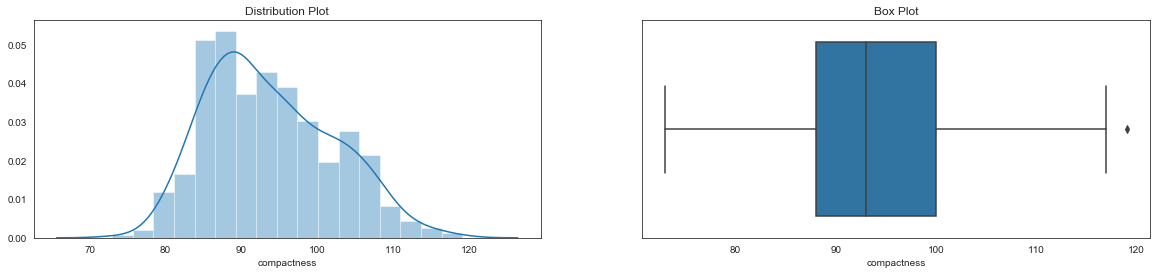

In [506]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_train['compactness'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_train['compactness'],ax=ax2)
ax2.set_title("Box Plot")

In [507]:
handleOutlier(df_train['compactness'])

25th Quantile value:  88.0
Outlier low Count = 0
List of Low outliers: 

Series([], Name: compactness, dtype: float64)
75th Quantile value:  100.0
Outlier High Count =  1
List of High outliers: 

44    119.0
Name: compactness, dtype: float64


In [508]:
#Lets see the complete row
df_train.loc[[44]]

compactness  circularity  distance_circularity  radius_ratio  \
44        119.0         54.0                 106.0         220.0   

    pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
44                  65.0                     12.0          213.0   

    elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
44           31.0                    24.0                      167.0   

    scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
44            223.0              675.0                      232.0   

    scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
44                         66.0            20.0               1.0   

    skewness_about.2  hollows_ratio  class  
44             192.0          202.0    1.0

In [509]:
#class is car. Lets observe few rows with class car- in terms of max values as it is high outlier
df_train[df_train['class']==1]['compactness'].sort_values( ascending=False).head(5)

44     119.0
346    117.0
283    116.0
761    115.0
788    115.0
Name: compactness, dtype: float64

In [510]:
# There are values like 117,116 so we will not treat this outlier. 119 does not seem to be do far.

#### Circularity

Text(0.5, 1.0, 'Box Plot')

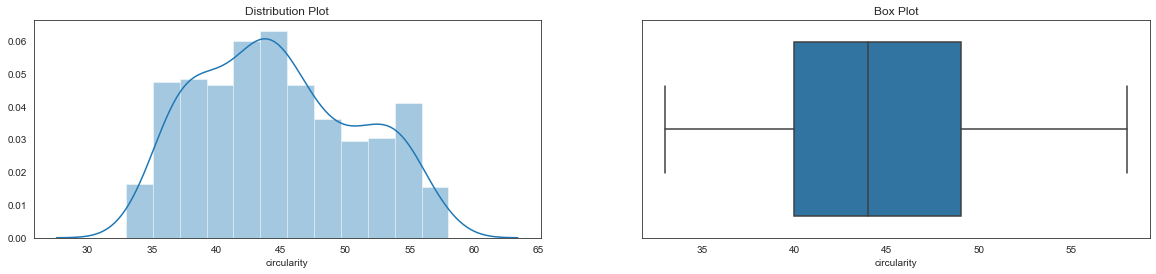

In [511]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_train['circularity'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_train['circularity'],ax=ax2)
ax2.set_title("Box Plot")

#### From above we can see that there are no outliers in circularity

#### Distance Circularity

Text(0.5, 1.0, 'Box Plot')

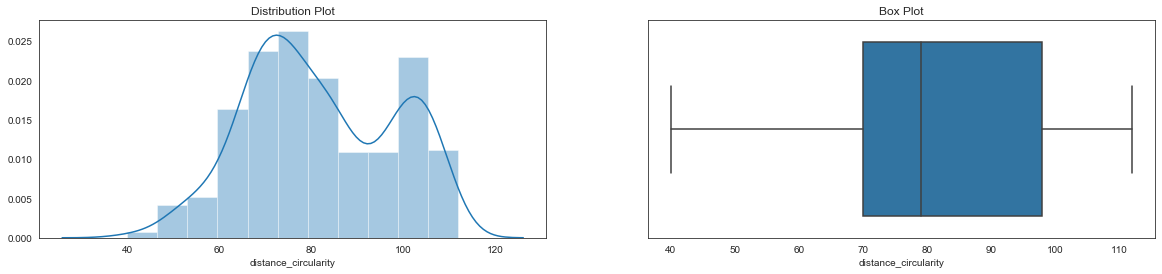

In [512]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_train['distance_circularity'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_train['distance_circularity'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are no outliers in distance_circularity column but in distribution plot we can see that there are two peaks and we can see that there is right skewness because long tail is at the right side(mean>median)

#### radius_ratio

Text(0.5, 1.0, 'Box Plot')

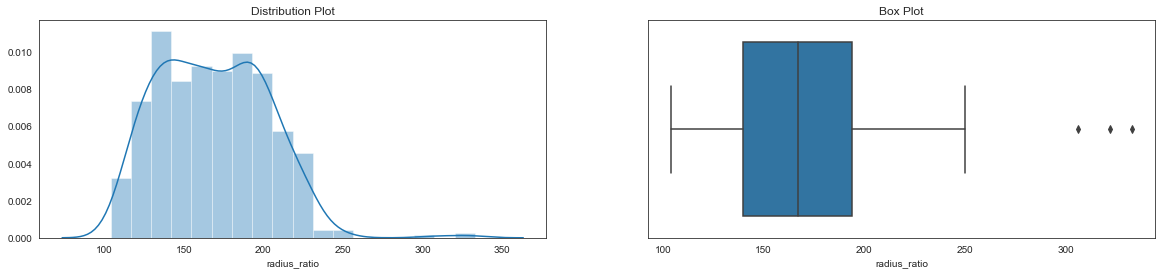

In [513]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_train['radius_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_train['radius_ratio'],ax=ax2)
ax2.set_title("Box Plot")

In [514]:
# There are certain outliers on the right side( high ouliers).Lets analyse them and make decision on their treatment
 
handleOutlier(df_train['radius_ratio'])

25th Quantile value:  140.0
Outlier low Count = 0
List of Low outliers: 

Series([], Name: radius_ratio, dtype: float64)
75th Quantile value:  194.0
Outlier High Count =  3
List of High outliers: 

135    322.0
388    333.0
37     306.0
Name: radius_ratio, dtype: float64


In [515]:
# Lets observe full rows for these outliers
df_train.loc[[37,135,388]]

compactness  circularity  distance_circularity  radius_ratio  \
37          90.0         48.0                  86.0         306.0   
135         89.0         47.0                  83.0         322.0   
388         94.0         47.0                  85.0         333.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
37                  126.0                     49.0          153.0   
135                 133.0                     48.0          158.0   
388                 138.0                     49.0          155.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
37            44.0                    19.0                      156.0   
135           43.0                    20.0                      163.0   
388           43.0                    19.0                      155.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
37             272.0              346.0                      200.0   
135            229.0              364.0                      176.0   
388            320.0              354.0                      187.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
37                         118.0             0.0              15.0   
135                         97.0             0.0              14.0   
388                        135.0            12.0               9.0   

     skewness_about.2  hollows_ratio  class  
37              185.0          194.0    2.0  
135             184.0          194.0    2.0  
388             188.0          196.0    2.0

In [516]:
# All these are for class van. Lets observe maximum radius_ratio for class van
df_train[df_train['class']==2]['radius_ratio'].sort_values( ascending=False).head(8)

388    333.0
135    322.0
37     306.0
706    250.0
291    246.0
523    231.0
0      178.0
535    176.0
Name: radius_ratio, dtype: float64

In [517]:
# values of radius ratio for outlier are far away  from the max value 250. Lets replace these values with 250
df_train.loc[[37,135,388],'radius_ratio']=250.0

C:\Users\manorama\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\manorama\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [518]:
#Double check the values if replaced correctly
df_train.loc[[37,135,388]]

compactness  circularity  distance_circularity  radius_ratio  \
37          90.0         48.0                  86.0         250.0   
135         89.0         47.0                  83.0         250.0   
388         94.0         47.0                  85.0         250.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
37                  126.0                     49.0          153.0   
135                 133.0                     48.0          158.0   
388                 138.0                     49.0          155.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
37            44.0                    19.0                      156.0   
135           43.0                    20.0                      163.0   
388           43.0                    19.0                      155.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
37             272.0              346.0                      200.0   
135            229.0              364.0                      176.0   
388            320.0              354.0                      187.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
37                         118.0             0.0              15.0   
135                         97.0             0.0              14.0   
388                        135.0            12.0               9.0   

     skewness_about.2  hollows_ratio  class  
37              185.0          194.0    2.0  
135             184.0          194.0    2.0  
388             188.0          196.0    2.0

#### pr.axis_aspect_ratio

Text(0.5, 1.0, 'Box Plot')

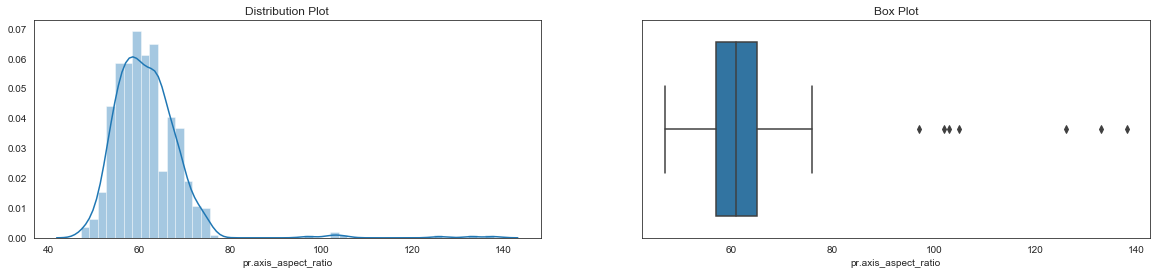

In [519]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_train['pr.axis_aspect_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_train['pr.axis_aspect_ratio'],ax=ax2)
ax2.set_title("Box Plot")

In [520]:
#here are many high outliers. Lets observe each of them and treat them

handleOutlier(df_train['pr.axis_aspect_ratio'])

25th Quantile value:  57.0
Outlier low Count = 0
List of Low outliers: 

Series([], Name: pr.axis_aspect_ratio, dtype: float64)
75th Quantile value:  65.0
Outlier High Count =  7
List of High outliers: 

135    133.0
388    138.0
37     126.0
291    102.0
706    105.0
4      103.0
523     97.0
Name: pr.axis_aspect_ratio, dtype: float64


In [521]:
# Lets observe full rows for these outliers
df_train.loc[[4,37,135,291,388,523,706]]

compactness  circularity  distance_circularity  radius_ratio  \
4           85.0         44.0                  70.0         205.0   
37          90.0         48.0                  86.0         250.0   
135         89.0         47.0                  83.0         250.0   
291         89.0         45.0                  81.0         246.0   
388         94.0         47.0                  85.0         250.0   
523         90.0         43.0                  81.0         231.0   
706         82.0         43.0                  70.0         250.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
4                   103.0                     52.0          149.0   
37                  126.0                     49.0          153.0   
135                 133.0                     48.0          158.0   
291                 102.0                     43.0          155.0   
388                 138.0                     49.0          155.0   
523                  97.0                     46.0          150.0   
706                 105.0                     55.0          139.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
4             45.0                    19.0                      144.0   
37            44.0                    19.0                      156.0   
135           43.0                    20.0                      163.0   
291           44.0                    20.0                      160.0   
388           43.0                    19.0                      155.0   
523           45.0                    19.0                      149.0   
706           48.0                    18.0                      145.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
4              241.0              325.0                      188.0   
37             272.0              346.0                      200.0   
135            229.0              364.0                      176.0   
291            200.0              347.0                      177.0   
388            320.0              354.0                      187.0   
523            200.0              332.0                      164.0   
706            231.0              289.0                      172.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
4                          127.0             9.0              11.0   
37                         118.0             0.0              15.0   
135                         97.0             0.0              14.0   
291                         90.0             9.0              17.0   
388                        135.0            12.0               9.0   
523                         91.0             5.0               9.0   
706                         99.0             4.0               9.0   

     skewness_about.2  hollows_ratio  class  
4               180.0          183.0    0.0  
37              185.0          194.0    2.0  
135             184.0          194.0    2.0  
291             183.0          192.0    2.0  
388             188.0          196.0    2.0  
523             186.0          196.0    2.0  
706             190.0          199.0    2.0

In [522]:
# Index 4  belongs to class Bus while others belong to class van. Lets observe max values of this column for
#both bus and van

In [523]:
# Lets Check for Bus first
df_train[df_train['class']==0]['pr.axis_aspect_ratio'].sort_values( ascending=False).head(8)

4      103.0
84      76.0
88      75.0
450     75.0
556     75.0
275     75.0
69      74.0
431     74.0
Name: pr.axis_aspect_ratio, dtype: float64

In [524]:
# For bus we can see values around 75 and max value 76. It is better to drop this row as the values 103 is
#significantly higher

df_train.drop(4, inplace=True)

C:\Users\manorama\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [525]:
# Lets Check for van now first
df_train[df_train['class']==2]['pr.axis_aspect_ratio'].sort_values( ascending=False).head(20)

388    138.0
135    133.0
37     126.0
706    105.0
291    102.0
523     97.0
0       72.0
668     70.0
732     69.0
449     68.0
744     68.0
457     68.0
68      68.0
722     68.0
172     67.0
35      67.0
535     67.0
391     66.0
842     66.0
328     66.0
Name: pr.axis_aspect_ratio, dtype: float64

In [526]:
##From 72 to 97 it is big jump in value and then other outlier values are even higher upto 138. It is better to drop 
#these rows

df_train.drop([37,135,291,388,523,706], inplace=True)

#### max.length_aspect_ratio

Text(0.5, 1.0, 'Box Plot')

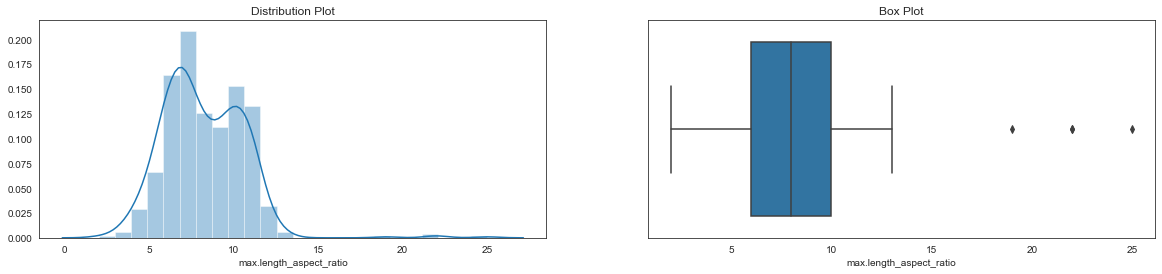

In [527]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_train['max.length_aspect_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_train['max.length_aspect_ratio'],ax=ax2)
ax2.set_title("Box Plot")

In [528]:
handleOutlier(df_train['max.length_aspect_ratio'])

25th Quantile value:  6.0
Outlier low Count = 0
List of Low outliers: 

Series([], Name: max.length_aspect_ratio, dtype: float64)
75th Quantile value:  10.0
Outlier High Count =  4
List of High outliers: 

391    25.0
127    22.0
815    22.0
544    19.0
Name: max.length_aspect_ratio, dtype: float64


In [529]:
# Lets observe full rows for these outliers
df_train.loc[[391,127,815,544]]

compactness  circularity  distance_circularity  radius_ratio  \
391         91.0         38.0                  70.0         160.0   
127         85.0         41.0                  66.0         155.0   
815         81.0         45.0                  68.0         154.0   
544         88.0         43.0                  70.0         177.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
391                  66.0                     25.0          140.0   
127                  65.0                     22.0          149.0   
815                  69.0                     22.0          151.0   
544                  74.0                     19.0          152.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
391           47.0                    18.0                      139.0   
127           45.0                    19.0                      139.0   
815           45.0                    19.0                      147.0   
544           44.0                    19.0                      143.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
391            162.0              296.0                      130.0   
127            173.0              330.0                      155.0   
815            186.0              335.0                      186.0   
544            180.0              342.0                      168.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
391                         67.0             4.0              11.0   
127                         75.0             6.0              16.0   
815                         88.0             1.0              10.0   
544                         76.0             1.0               9.0   

     skewness_about.2  hollows_ratio  class  
391             192.0          202.0    2.0  
127             184.0          191.0    0.0  
815             180.0          185.0    0.0  
544             186.0          189.0    0.0

In [530]:
# row with index 391 is for van and others are for bus. lets observe max values as ouliers are hgh in nature

# Lets Check for van now first
df_train[df_train['class']==2]['max.length_aspect_ratio'].sort_values( ascending=False).head(20)

391    25.0
254    12.0
545    12.0
668    12.0
441    11.0
235    11.0
477    11.0
74     11.0
200    11.0
115    11.0
842    11.0
252    11.0
121    11.0
573    11.0
682    11.0
693    11.0
45     11.0
125    11.0
657    11.0
146    11.0
Name: max.length_aspect_ratio, dtype: float64

In [531]:
# Outlier is double the max value which is 12. better drop this row

df_train.drop(391, inplace=True)

C:\Users\manorama\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [532]:
# Lets Check for bus now
df_train[df_train['class']==0]['max.length_aspect_ratio'].sort_values( ascending=False).head(20)

127    22.0
815    22.0
544    19.0
304     8.0
274     8.0
218     8.0
765     8.0
390     8.0
714     8.0
770     8.0
108     8.0
590     8.0
553     8.0
529     8.0
322     8.0
36      7.0
412     7.0
129     7.0
178     7.0
199     7.0
Name: max.length_aspect_ratio, dtype: float64

In [533]:
# Again for bus max length aspect ratio is 8 and Junp from 8 to 19/22 is too high. Lets drop this outlier from train set

In [534]:
df_train.drop([127,815,544], inplace=True)

#### Scatter Ratio

Text(0.5, 1.0, 'Box Plot')

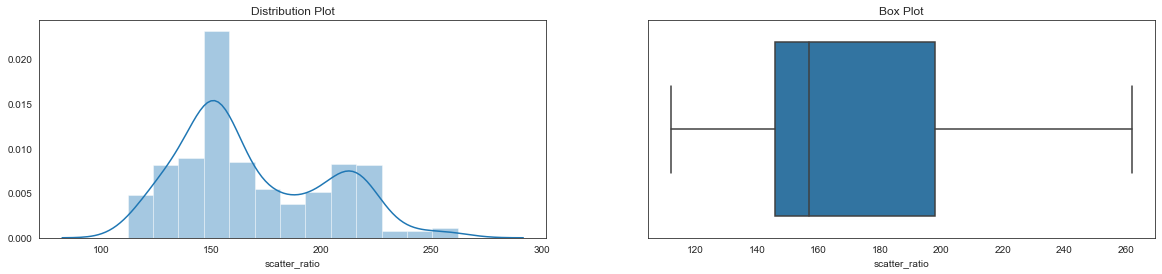

In [535]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_train['scatter_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_train['scatter_ratio'],ax=ax2)
ax2.set_title("Box Plot")

#### No Outlier in scatter ratio

#### elongatedness

Text(0.5, 1.0, 'Box Plot')

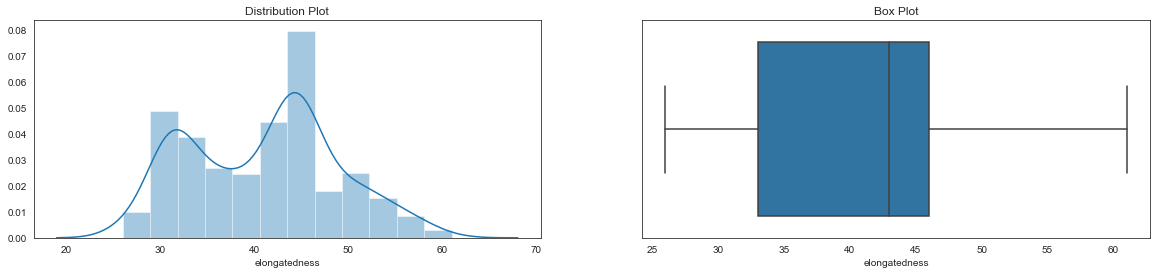

In [536]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_train['elongatedness'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_train['elongatedness'],ax=ax2)
ax2.set_title("Box Plot")

#### No Outlier in elongetdness

#### pr.axis_rectangularity

Text(0.5, 1.0, 'Box Plot')

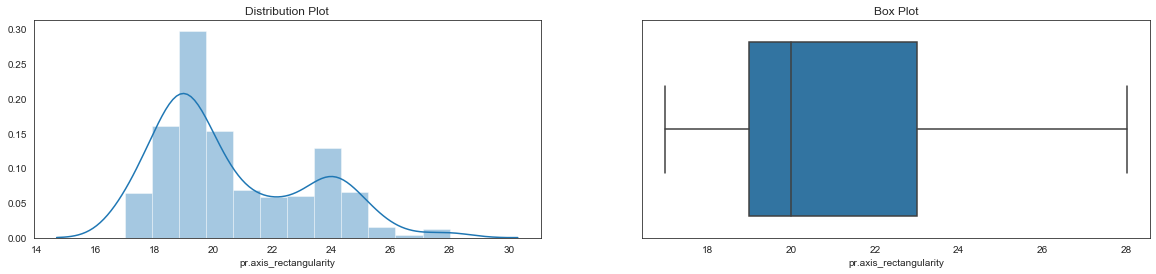

In [537]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_train['pr.axis_rectangularity'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_train['pr.axis_rectangularity'],ax=ax2)
ax2.set_title("Box Plot")

#### No Outlier in pr_axis_rectangularity

#### max.length_rectangularity

Text(0.5, 1.0, 'Box Plot')

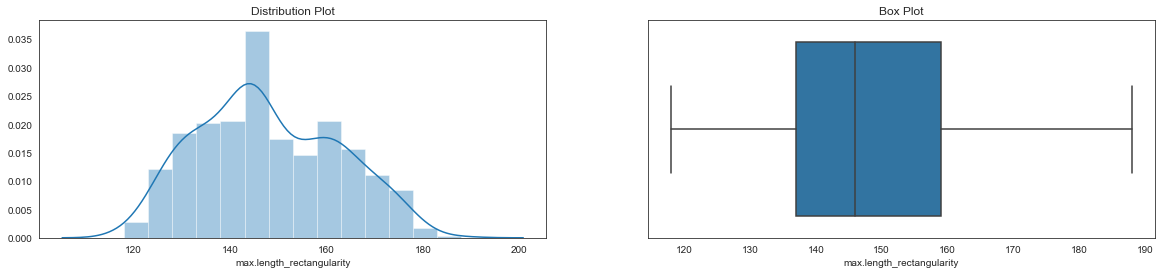

In [538]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_train['max.length_rectangularity'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_train['max.length_rectangularity'],ax=ax2)
ax2.set_title("Box Plot")

#### No Outlier in max.length_rectangularity

#### scaled_variance

Text(0.5, 1.0, 'Box Plot')

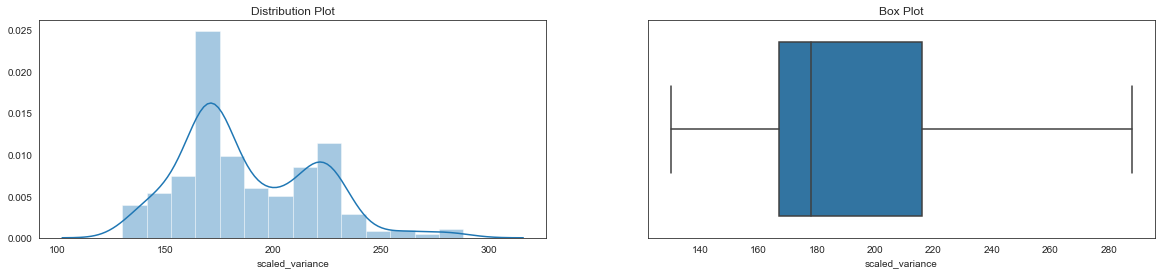

In [539]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_train['scaled_variance'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_train['scaled_variance'],ax=ax2)
ax2.set_title("Box Plot")

#### No Outlier in scaled_variance

#### scaled_variance.1

Text(0.5, 1.0, 'Box Plot')

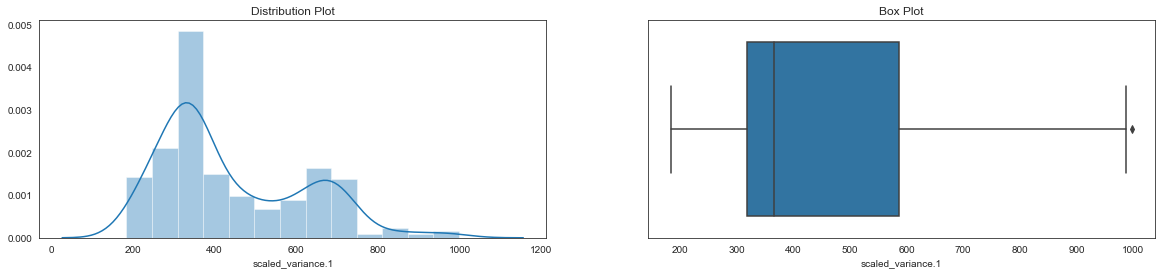

In [540]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_train['scaled_variance.1'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_train['scaled_variance.1'],ax=ax2)
ax2.set_title("Box Plot")

In [541]:
#There is one outlier in scaled_Variance.1

handleOutlier(df_train['scaled_variance.1'])

25th Quantile value:  318.0
Outlier low Count = 0
List of Low outliers: 

Series([], Name: scaled_variance.1, dtype: float64)
75th Quantile value:  586.25
Outlier High Count =  1
List of High outliers: 

85    998.0
Name: scaled_variance.1, dtype: float64


In [542]:
# Lets observe full row for this outliers
df_train.loc[[85]]

compactness  circularity  distance_circularity  radius_ratio  \
85        110.0         58.0                 106.0         180.0   

    pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
85                  51.0                      6.0          261.0   

    elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
85           26.0                    28.0                      171.0   

    scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
85            278.0              998.0                      257.0   

    scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
85                         83.0             9.0              13.0   

    skewness_about.2  hollows_ratio  class  
85             181.0          182.0    0.0

In [543]:
# The outlier belongs to class car. Lets observe max values as it is high outlier
df_train[df_train['class']==0]['scaled_variance.1'].sort_values( ascending=False).head(8)

85     998.0
687    987.0
321    982.0
733    968.0
5      957.0
274    954.0
155    928.0
381    923.0
Name: scaled_variance.1, dtype: float64

#### There are values in contnuity like 982,987, 962 hence 998 does not look very high. We will leave this outlier as is.

#### scaled_radius_of_gyration.1

Text(0.5, 1.0, 'Box Plot')

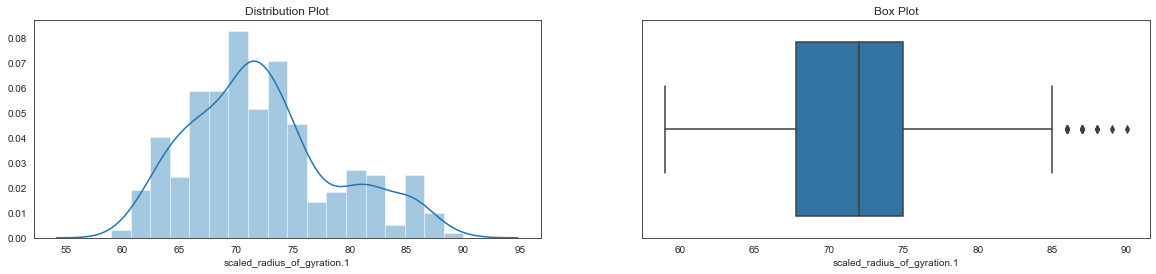

In [544]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_train['scaled_radius_of_gyration.1'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_train['scaled_radius_of_gyration.1'],ax=ax2)
ax2.set_title("Box Plot")

#### lot of high outliers

In [545]:
handleOutlier(df_train['scaled_radius_of_gyration.1'])

25th Quantile value:  67.75
Outlier low Count = 0
List of Low outliers: 

Series([], Name: scaled_radius_of_gyration.1, dtype: float64)
75th Quantile value:  75.0
Outlier High Count =  21
List of High outliers: 

687    86.0
734    87.0
492    86.0
834    86.0
515    87.0
351    86.0
41     86.0
231    86.0
232    86.0
160    87.0
553    86.0
79     88.0
568    87.0
612    87.0
230    89.0
655    90.0
420    86.0
463    87.0
790    87.0
47     88.0
381    88.0
Name: scaled_radius_of_gyration.1, dtype: float64


In [546]:
# Lets observe full row for this outliers
df_train.loc[[687,734,492,834,515,351,41,231,232,160,553,79,568,612,230,655,420,463,790,47,381]]

compactness  circularity  distance_circularity  radius_ratio  \
687        106.0         57.0                 107.0         235.0   
734         88.0         40.0                  55.0         114.0   
492         85.0         43.0                  66.0         130.0   
834         82.0         36.0                  51.0         114.0   
515         76.0         38.0                  58.0         125.0   
351         88.0         38.0                  58.0         137.0   
41          88.0         37.0                  51.0         105.0   
231         85.0         33.0                  40.0         115.0   
232         81.0         44.0                  68.0         120.0   
160         82.0         38.0                  53.0         125.0   
553         86.0         45.0                  66.0         126.0   
79          89.0         44.0                  68.0         113.0   
568         86.0         43.0                  69.0         123.0   
612         80.0         34.0                  42.0         110.0   
230         85.0         35.0                  47.0         110.0   
655         86.0         35.0                  44.0         110.0   
420         96.0         39.0                  58.0         117.0   
463         85.0         40.0                  66.0         121.0   
790         85.0         43.0                  66.0         120.0   
47          85.0         42.0                  66.0         122.0   
381        106.0         54.0                 100.0         227.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
687                  67.0                      6.0          262.0   
734                  53.0                      7.0          132.0   
492                  57.0                      6.0          151.0   
834                  53.0                      4.0          135.0   
515                  58.0                      5.0          133.0   
351                  60.0                      5.0          148.0   
41                   52.0                      5.0          119.0   
231                  57.0                      3.0          112.0   
232                  53.0                      6.0          151.0   
160                  59.0                      5.0          133.0   
553                  57.0                      8.0          148.0   
79                   50.0                      7.0          150.0   
568                  54.0                      6.0          150.0   
612                  57.0                      3.0          114.0   
230                  55.0                      3.0          117.0   
655                  54.0                      2.0          119.0   
420                  51.0                      6.0          133.0   
463                  52.0                      4.0          152.0   
790                  54.0                      5.0          148.0   
47                   54.0                      6.0          148.0   
381                  67.0                      4.0          250.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
687           26.0                    28.0                      171.0   
734           53.0                    18.0                      139.0   
492           45.0                    19.0                      143.0   
834           50.0                    18.0                      126.0   
515           51.0                    18.0                      127.0   
351           46.0                    19.0                      131.0   
41            57.0                    17.0                      128.0   
231           61.0                    17.0                      119.0   
232           45.0                    19.0                      147.0   
160           51.0                    18.0                      128.0   
553           46.0                    19.0                      145.0   
79            45.0                    19.0                      147.0   
568           46.0

In [547]:
# Lets observe full row for this outliers for class Bus
df_train.loc[[687,734,492,834,515,351,41,231,232,160,553,79,568,612,230,655,420,463,790,47,381]][df_train['class']==0]

C:\Users\manorama\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


compactness  circularity  distance_circularity  radius_ratio  \
687        106.0         57.0                 107.0         235.0   
492         85.0         43.0                  66.0         130.0   
232         81.0         44.0                  68.0         120.0   
553         86.0         45.0                  66.0         126.0   
79          89.0         44.0                  68.0         113.0   
568         86.0         43.0                  69.0         123.0   
790         85.0         43.0                  66.0         120.0   
47          85.0         42.0                  66.0         122.0   
381        106.0         54.0                 100.0         227.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
687                  67.0                      6.0          262.0   
492                  57.0                      6.0          151.0   
232                  53.0                      6.0          151.0   
553                  57.0                      8.0          148.0   
79                   50.0                      7.0          150.0   
568                  54.0                      6.0          150.0   
790                  54.0                      5.0          148.0   
47                   54.0                      6.0          148.0   
381                  67.0                      4.0          250.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
687           26.0                    28.0                      171.0   
492           45.0                    19.0                      143.0   
232           45.0                    19.0                      147.0   
553           46.0                    19.0                      145.0   
79            45.0                    19.0                      147.0   
568           46.0                    19.0                      144.0   
790           46.0                    19.0                      145.0   
47            46.0                    19.0                      141.0   
381           27.0                    27.0                      162.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
687            285.0              987.0                      260.0   
492            173.0              333.0                      168.0   
232            170.0              333.0                      178.0   
553            170.0              321.0                      186.0   
79             171.0              328.0                      189.0   
568            174.0              325.0                      177.0   
790            168.0              320.0                      174.0   
47             172.0              317.0                      174.0   
381            280.0              923.0                      262.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
687                         86.0             9.0              31.0   
492                         86.0             4.0               9.0   
232                         86.0             4.0               5.0   
553                         86.0             0.0               7.0   
79                          88.0             6.0               5.0   
568                         87.0             3.0               7.0   
790                         87.0             8.0               2.0   
47                          88.0             6.0              14.0   
381                         88.0             5.0              11.0   

     skewness_about.2  hollows_ratio  class  
687             180.0          184.0    0.0  
492             180.0          183.0    0.0  
232             179.0          183.0    0.0  
553             179.0          182.0    0.0  
79              179.0          182.0    0.0  
568             180.0          182.0    0.0  
790             179.0          181.0    0.0  
47              180.0          182.0    0.0  
381             182.0          182.0    0.0

In [548]:
# The outlier belongs to class car. Lets observe max values as it is high outlier
df_train[df_train['class']==0]['scaled_radius_of_gyration.1'].sort_values( ascending=False).head(20)

381    88.0
47     88.0
79     88.0
790    87.0
568    87.0
492    86.0
232    86.0
687    86.0
553    86.0
322    85.0
685    85.0
321    85.0
785    85.0
529    85.0
444    85.0
733    85.0
580    85.0
155    85.0
390    85.0
5      85.0
Name: scaled_radius_of_gyration.1, dtype: float64

In [549]:
# Values ouliers for buses are almost in range of max. We will neithr delete them nor replace them-leave as is

# Lets observe full row for this outliers for class van
df_train.loc[[687,734,492,834,515,351,41,231,232,160,553,79,568,612,230,655,420,463,790,47,381]][df_train['class']==2]

C:\Users\manorama\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


compactness  circularity  distance_circularity  radius_ratio  \
734         88.0         40.0                  55.0         114.0   
41          88.0         37.0                  51.0         105.0   
230         85.0         35.0                  47.0         110.0   
655         86.0         35.0                  44.0         110.0   
420         96.0         39.0                  58.0         117.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
734                  53.0                      7.0          132.0   
41                   52.0                      5.0          119.0   
230                  55.0                      3.0          117.0   
655                  54.0                      2.0          119.0   
420                  51.0                      6.0          133.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
734           53.0                    18.0                      139.0   
41            57.0                    17.0                      128.0   
230           57.0                    17.0                      122.0   
655           57.0                    17.0                      121.0   
420           52.0                    18.0                      139.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
734            142.0              249.0                      158.0   
41             135.0              207.0                      125.0   
230            136.0              203.0                      139.0   
655            139.0              208.0                      137.0   
420            154.0              255.0                      150.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
734                         87.0             0.0               7.0   
41                          86.0             8.0              16.0   
230                         89.0             5.0               9.0   
655                         90.0             6.0               1.0   
420                         86.0             6.0               0.0   

     skewness_about.2  hollows_ratio  class  
734             176.0          183.0    2.0  
41              179.0          183.0    2.0  
230             180.0          184.0    2.0  
655             180.0          183.0    2.0  
420             181.0          182.0    2.0

In [550]:
# The outliers belong to class van. Lets observe max values as it is high outlier
df_train[df_train['class']==2]['scaled_radius_of_gyration.1'].sort_values( ascending=False).head(20)

655    90.0
230    89.0
734    87.0
420    86.0
41     86.0
534    85.0
617    85.0
374    85.0
546    85.0
594    84.0
318    82.0
21     82.0
751    81.0
16     80.0
779    80.0
62     80.0
445    79.0
456    79.0
269    79.0
550    78.0
Name: scaled_radius_of_gyration.1, dtype: float64

In [551]:
# Values ouliers for vans are almost in range of max. We will neither delete them nor replace them-leave as is

# Lets observe full row for this outliers for class car
df_train.loc[[687,734,492,834,515,351,41,231,232,160,553,79,568,612,230,655,420,463,790,47,381]][df_train['class']==1]

C:\Users\manorama\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


compactness  circularity  distance_circularity  radius_ratio  \
834         82.0         36.0                  51.0         114.0   
515         76.0         38.0                  58.0         125.0   
351         88.0         38.0                  58.0         137.0   
231         85.0         33.0                  40.0         115.0   
160         82.0         38.0                  53.0         125.0   
612         80.0         34.0                  42.0         110.0   
463         85.0         40.0                  66.0         121.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
834                  53.0                      4.0          135.0   
515                  58.0                      5.0          133.0   
351                  60.0                      5.0          148.0   
231                  57.0                      3.0          112.0   
160                  59.0                      5.0          133.0   
612                  57.0                      3.0          114.0   
463                  52.0                      4.0          152.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
834           50.0                    18.0                      126.0   
515           51.0                    18.0                      127.0   
351           46.0                    19.0                      131.0   
231           61.0                    17.0                      119.0   
160           51.0                    18.0                      128.0   
612           59.0                    17.0                      119.0   
463           44.0                    19.0                      133.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
834            150.0              268.0                      144.0   
515            152.0              259.0                      145.0   
351            163.0              319.0                      157.0   
231            130.0              184.0                      127.0   
160            152.0              259.0                      146.0   
612            131.0              191.0                      121.0   
463            170.0              340.0                      163.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
834                         86.0            15.0               4.0   
515                         87.0             0.0              21.0   
351                         86.0            12.0               0.0   
231                         86.0            12.0              21.0   
160                         87.0             0.0               0.0   
612                         87.0             4.0               7.0   
463                         87.0            13.0               3.0   

     skewness_about.2  hollows_ratio  class  
834             181.0          182.0    1.0  
515             177.0          184.0    1.0  
351             180.0          183.0    1.0  
231             181.0          183.0    1.0  
160             177.0          183.0    1.0  
612             179.0          183.0    1.0  
463             180.0          183.0    1.0

In [552]:
# The outlier belongs to class car. Lets observe max values as it is high outlier
df_train[df_train['class']==1]['scaled_radius_of_gyration.1'].sort_values( ascending=False).head(20)

612    87.0
160    87.0
463    87.0
515    87.0
351    86.0
834    86.0
231    86.0
342    85.0
411    84.0
29     83.0
614    83.0
289    83.0
73     82.0
26     82.0
688    82.0
260    81.0
89     81.0
229    80.0
380    80.0
662    79.0
Name: scaled_radius_of_gyration.1, dtype: float64

In [553]:
# Values ouliers for cars are almost in range of max. We will neither delete them nor replace them-leave as is

#### skewness_about

Text(0.5, 1.0, 'Box Plot')

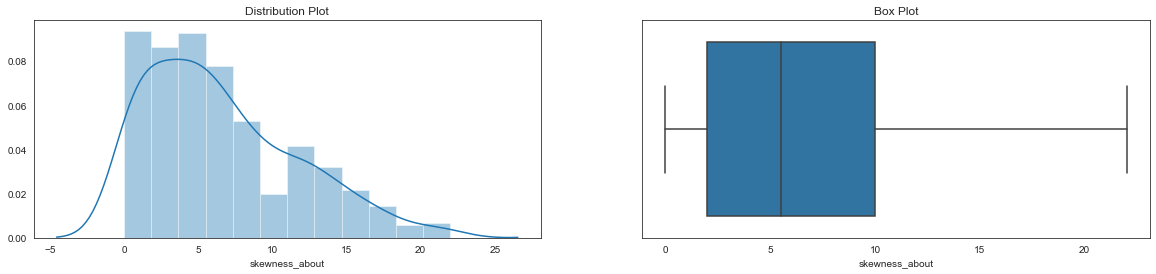

In [554]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_train['skewness_about'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_train['skewness_about'],ax=ax2)
ax2.set_title("Box Plot")

#### No outlier in skewness_about field

#### skewness_about.1

Text(0.5, 1.0, 'Box Plot')

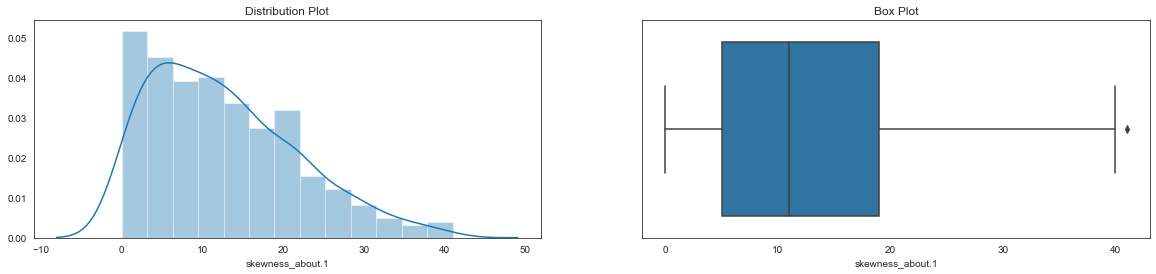

In [555]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_train['skewness_about.1'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_train['skewness_about.1'],ax=ax2)
ax2.set_title("Box Plot")

#### There is one high outlier


In [556]:
 handleOutlier(df_train['skewness_about.1'])

25th Quantile value:  5.0
Outlier low Count = 0
List of Low outliers: 

Series([], Name: skewness_about.1, dtype: float64)
75th Quantile value:  19.0
Outlier High Count =  1
List of High outliers: 

132    41.0
Name: skewness_about.1, dtype: float64


In [557]:
#Lets observe the full row of the outlier
df_train.loc[[132]]
# Outlier belongs to class 1 that is car

compactness  circularity  distance_circularity  radius_ratio  \
132         97.0         42.0                 101.0         186.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
132                  59.0                      9.0          186.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
132           36.0                    22.0                      138.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
132            208.0              511.0                      168.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
132                         67.0             7.0              41.0   

     skewness_about.2  hollows_ratio  class  
132             194.0          206.0    1.0

In [558]:
##Lets observe max values for car class
df_train[df_train['class']==1]['skewness_about.1'].sort_values( ascending=False).head(20)

132    41.0
513    40.0
142    39.0
361    38.0
176    38.0
623    38.0
33     38.0
624    36.0
506    36.0
298    35.0
570    35.0
730    35.0
413    35.0
622    34.0
439    33.0
507    33.0
106    33.0
158    33.0
427    33.0
317    32.0
Name: skewness_about.1, dtype: float64

#### Value is well in range of max value of skewness_about.1 for cars. we will not delete or replace it

#### skewness_about.2

Text(0.5, 1.0, 'Box Plot')

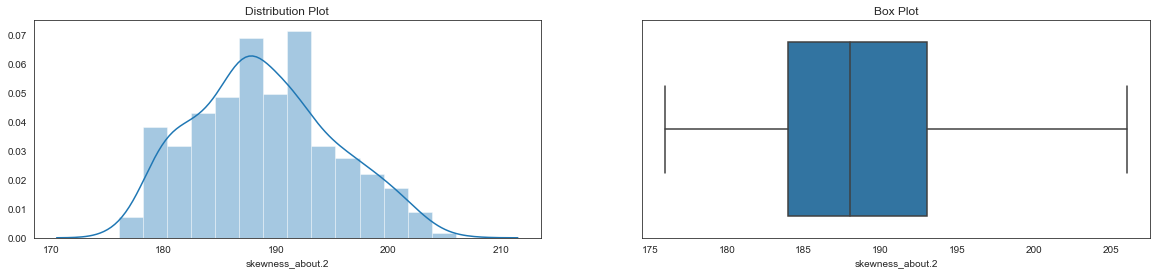

In [559]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_train['skewness_about.2'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_train['skewness_about.2'],ax=ax2)
ax2.set_title("Box Plot")

#### No Outliers for skewness_about.2

#### hollows ratio

Text(0.5, 1.0, 'Box Plot')

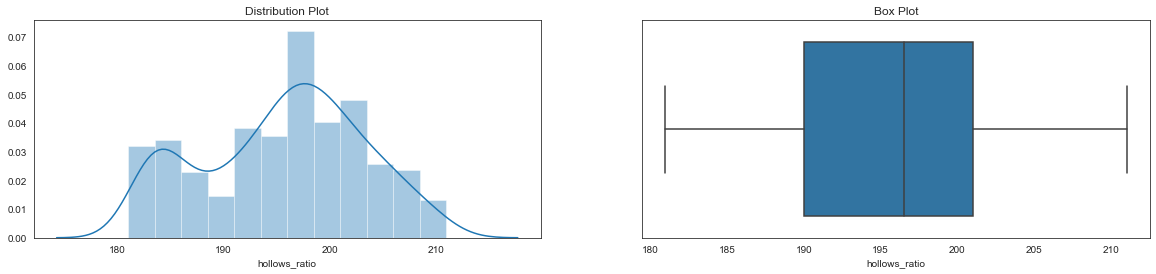

In [560]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df_train['hollows_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(df_train['hollows_ratio'],ax=ax2)
ax2.set_title("Box Plot")

#### No Outliers for hollows_ratio

#### Final shape and statistic of train set after missing values and outlier treatment

In [561]:
df_train.shape


(576, 19)

In [562]:
df_train.describe().T

count        mean         std    min     25%  \
compactness                  576.0   93.859375    8.267864   73.0   88.00   
circularity                  576.0   44.776042    6.107459   33.0   40.00   
distance_circularity         576.0   81.966146   15.967771   40.0   70.00   
radius_ratio                 576.0  167.369792   32.256209  104.0  140.00   
pr.axis_aspect_ratio         576.0   60.989583    5.690868   47.0   57.00   
max.length_aspect_ratio      576.0    8.081597    2.129366    2.0    6.00   
scatter_ratio                576.0  168.765625   33.305160  112.0  146.00   
elongatedness                576.0   40.965278    7.902812   26.0   33.00   
pr.axis_rectangularity       576.0   20.572917    2.590598   17.0   19.00   
max.length_rectangularity    576.0  147.788194   14.413892  118.0  137.00   
scaled_variance              576.0  188.003472   31.221843  130.0  167.00   
scaled_variance.1            576.0  439.654514  176.679697  184.0  318.00   
scaled_radius_of_gyration    576.0  174.571181   32.546290  109.0  149.00   
scaled_radius_of_gyration.1  576.0   72.270833    6.419772   59.0   67.75   
skewness_about               576.0    6.572917    5.100884    0.0    2.00   
skewness_about.1             576.0   12.614583    9.056195    0.0    5.00   
skewness_about.2             576.0  188.940972    6.177377  176.0  184.00   
hollows_ratio                576.0  195.538194    7.557221  181.0  190.00   
class                        576.0    0.984375    0.706319    0.0    0.00   

                               50%     75%    max  
compactness                   93.0  100.00  119.0  
circularity                   44.0   49.00   58.0  
distance_circularity          79.5   98.00  112.0  
radius_ratio                 166.0  194.00  246.0  
pr.axis_aspect_ratio          61.0   65.00   76.0  
max.length_aspect_ratio        8.0   10.00   13.0  
scatter_ratio                157.0  198.00  262.0  
elongatedness                 43.0   46.00   61.0  
pr.axis_rectangularity        20.0   23.00   28.0  
max.length_rectangularity    146.0  159.00  188.0  
scaled_variance              178.0  216.00  288.0  
scaled_variance.1            366.0  586.25  998.0  
scaled_radius_of_gyration    174.0  196.00  264.0  
scaled_radius_of_gyration.1   72.0   75.00   90.0  
skewness_about                 5.5   10.00   22.0  
skewness_about.1              11.0   19.00   41.0  
skewness_about.2             188.0  193.00  206.0  
hollows_ratio                196.5  201.00  211.0  
class                          1.0    1.00    2.0

### PCA & Dimensionality Reduction

In [563]:
X = df.iloc[:,0:18].values
y = df.iloc[:,18].values

X

array([[ 95.,  48.,  83., ...,  16., 187., 197.],
       [ 91.,  41.,  84., ...,  14., 189., 199.],
       [104.,  50., 106., ...,   9., 188., 196.],
       ...,
       [106.,  54., 101., ...,   4., 187., 201.],
       [ 86.,  36.,  78., ...,  25., 190., 195.],
       [ 85.,  36.,  66., ...,  18., 186., 190.]])

In [564]:

#We transform (centralize) the entire X (independent variable data) to normalize it using standardscalar through transformation. We will create the PCA dimensions
# on this distribution. 
sc = StandardScaler()
X_std =  sc.fit_transform(X)   


### Calculating covariance matrix:
Covariance matrix should be 18*18 matrix

In [565]:
cov_matrix = np.cov(X_std.T)
print("cov_matrix shape:",cov_matrix.shape)
print("Covariance_matrix",cov_matrix)

cov_matrix shape: (18, 18)
Covariance_matrix [[ 1.00119332e+00  6.87422884e-01  7.89737511e-01  6.87452630e-01
   8.69465846e-02  1.47158906e-01  8.13254558e-01 -7.88236505e-01
   8.13454152e-01  6.76414985e-01  7.63269258e-01  8.17401948e-01
   5.85637590e-01 -2.47469589e-01  2.35509907e-01  1.60467109e-01
   2.92485229e-01  3.59435206e-01]
 [ 6.87422884e-01  1.00119332e+00  7.93549801e-01  6.23155640e-01
   1.52809127e-01  2.51663955e-01  8.51375681e-01 -8.21719469e-01
   8.46625607e-01  9.63772098e-01  7.94517987e-01  8.40830492e-01
   9.27835429e-01  5.33693577e-02  1.44560755e-01 -8.81720770e-03
  -1.10579255e-01  4.26224137e-02]
 [ 7.89737511e-01  7.93549801e-01  1.00119332e+00  7.68234509e-01
   1.55615793e-01  2.63822458e-01  9.06539535e-01 -9.11792018e-01
   8.93681438e-01  7.73718489e-01  8.61524098e-01  8.88151362e-01
   7.05218543e-01 -2.26245552e-01  1.12036738e-01  2.69492980e-01
   1.42288375e-01  3.30305884e-01]
 [ 6.87452630e-01  6.23155640e-01  7.68234509e-01  1.00119

### Calculating Eigen Vectors & Eigen Values: Using numpy linear algebra function


In [566]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 2.74932650e-01  1.27451549e-01  1.19687890e-01 -7.90541879e-02
  -7.10057921e-02  1.41652210e-01  4.54821476e-01  5.68251423e-01
   4.80946242e-01  2.60409325e-01 -4.22533793e-02  1.39839748e-02
  -1.61437436e-01  3.24116269e-03 -8.36528911e-04 -4.65420791e-02
  -5.69667673e-02  1.12306003e-02]
 [ 2.93678751e-01 -1.23847868e-01  2.52725695e-02 -1.89433814e-01
   8.66117215e-02 -3.00136432e-01 -2.48013358e-01  1.78459703e-01
   2.09591730e-02 -1.02751679e-01  6.67101244e-03 -1.68409688e-01
  -2.63885681e-02  1.23087856e-04 -1.00237821e-01 -4.26892645e-01
   3.81243799e-01 -5.41495141e-01]
 [ 3.04377009e-01  7.57484567e-02  5.53357198e-02  7.05347086e-02
  -3.91886026e-02 -1.39373402e-01  7.13656860e-02 -4.35615083e-01
   1.76987769e-01  2.07827180e-01 -7.10052407e-01 -3.26186919e-02
   2.14732260e-01  4.29766226e-03  1.95137979e-02  5.61633867e-02
  -1.41192019e-01 -1.68556955e-01]
 [ 2.67390673e-01  1.88662841e-01 -2.76805283e-01  4.23466063e-02
   4.46057366e-02  

#### Sort eigenvalues in descending order

In [567]:

# Make a set of (eigenvalue, eigenvector) pairs:

eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(9.404243893839162, array([ 0.27493265,  0.29367875,  0.30437701,  0.26739067,  0.07930483,
        0.09688422,  0.31751102, -0.31399395,  0.31425429,  0.28276356,
        0.30939406,  0.31455488,  0.27219698, -0.01942018,  0.0408814 ,
        0.05948253,  0.0274544 ,  0.07161317])), (3.0152231968322356, array([ 0.12745155, -0.12384787,  0.07574846,  0.18866284,  0.11846055,
       -0.0125327 , -0.046529  , -0.0142943 , -0.05961542, -0.11480779,
       -0.06095509, -0.05191391, -0.20753261, -0.48938586,  0.05531089,
        0.12474618,  0.54159647,  0.54117069])), (1.909605610748981, array([ 0.11968789,  0.02527257,  0.05533572, -0.27680528, -0.64298766,
       -0.59096462,  0.09710819, -0.05725449,  0.10977226,  0.01737759,
       -0.05611158,  0.10885546,  0.03200592, -0.28468639,  0.11460826,
        0.07412967, -0.01151657, -0.04229588])), (1.1823812293857652, array([-0.07905419, -0.18943381,  0.07053471,  0.04234661, -0.03284857,
       -0.03370836,  0.09437995, -0.0853353 ,  0.0

In [568]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 18 entries as there are 18 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 18 entries with 18 th entry 
# cumulative reaching almost 100%

#### Plotting The Explained Variance and Princiapl Components:

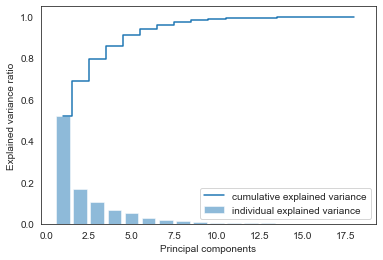

In [569]:

plt.bar(range(1,19), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,19),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()


#### Quick Observation:
- From above we plot we can clealry observer that 8 dimension() are able to explain 95 %variance of data. 
- so we will use first 8 principal components going forward and calulate the reduced dimensions. 


### Dimensionality Reduction
Now 8 dimensions seems very reasonable. With 8 variables we can explain over 95% of the variation in the original data!

In [570]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigvectors_sorted[0:8])   # Reducing from 8 to 4 dimension space

X_std_8D = np.dot(X_std,P_reduce.T)   # projecting original data into principal component dimensions

reduced_pca = pd.DataFrame(X_std_8D)  # converting array to dataframe for pairplot

reduced_pca

0         1          2         3         4         5         6  \
0    0.321418  0.201432  -0.997183 -0.183981 -0.071503 -0.754326 -0.898404   
1   -1.603368  0.404983   0.371494 -0.233142 -0.692490 -0.523270  0.372436   
2    3.755843 -0.193732  -0.087728 -1.206066 -0.725437  0.705587 -0.030259   
3   -1.759450  2.814827  -0.116280 -0.375690  0.363380 -0.481939  0.468441   
4    0.549588 -4.827608 -11.651324 -0.148205 -3.250734 -0.241274  2.665630   
..        ...       ...        ...       ...       ...       ...       ...   
834 -0.451570  0.588185  -0.197551  1.443110 -1.072894  0.810201 -0.040759   
835 -0.324922 -0.181753  -0.787442  0.899830  0.240267 -1.439251 -0.605103   
836  4.794762  0.005989  -0.529790 -0.302930  1.348675 -0.211720  0.575723   
837 -3.302811  0.984182   0.358483  1.930634 -0.049286 -0.407380 -0.207611   
838 -4.769236 -0.367007   0.576371  1.226460  0.044969 -0.344001  0.054551   

            7  
0    0.386264  
1   -0.253895  
2   -0.479157  
3    0.023879  
4    0.415742  
..        ...  
834 -0.505600  
835  0.150685  
836 -0.102362  
837 -0.319309  
838  0.248296  

[839 rows x 8 columns]

#### The Pairplot Of Reduced Dimension After PCA:


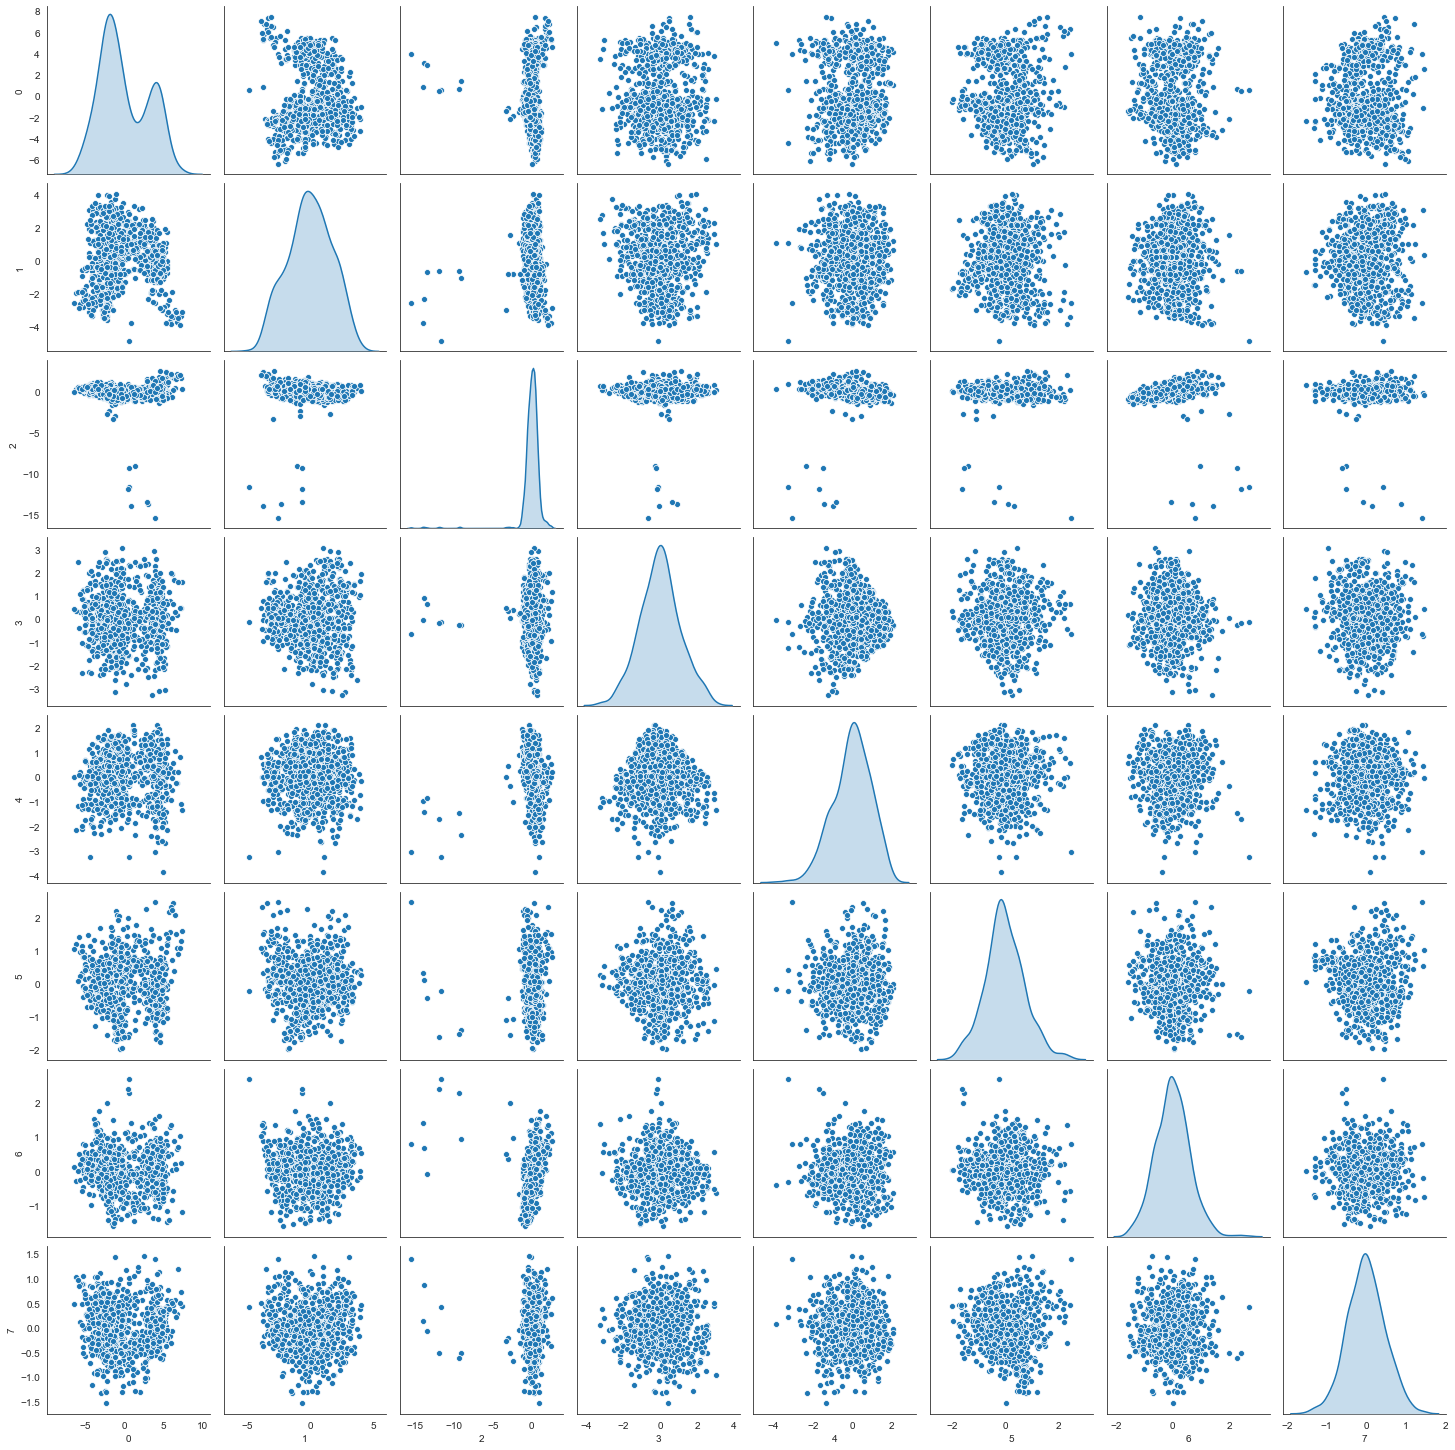

In [571]:
sns.pairplot(reduced_pca, diag_kind='kde') 
plt.show()

#### It is clealry visible from the pairplot above that:
After dimensionality reduction using PCA our attributes have become independent with no correlation among themselves. As most of them have cloud of data points with no lienaer kind of relationship.

### Fitting Model and measuring score simply on Original Data :


#### Fit SVC Model ON Train-test Data:
Let's build two Support Vector Classifier Model one with 18 original independent variables and the second one with only the 8 new reduced variables constructed using PCA.

In [572]:
#now split the data into 70:30 ratio

#orginal Data
Orig_X_train,Orig_X_test,Orig_y_train,Orig_y_test = train_test_split(X_std,y,test_size=0.30,random_state=1)

#PCA Data
pca_X_train,pca_X_test,pca_y_train,pca_y_test = train_test_split(reduced_pca,y,test_size=0.30,random_state=1)


### Let's train the model with both original data and pca data with new dimension

### Fitting SVC model On Original Data

In [573]:
svc = SVC() #instantiate the object


In [574]:
#fit the model on orighinal raw data
svc.fit(Orig_X_train,Orig_y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [575]:
#predict the y value
Orig_y_predict = svc.predict(Orig_X_test)


### Fitting SVC ON PCA Data: 

In [576]:
#now fit the model on pca data with new dimension
svc1 = SVC() #instantiate the object
svc1.fit(pca_X_train,pca_y_train)

#predict the y value
pca_y_predict = svc1.predict(pca_X_test)

In [577]:
#display accuracy score of both models

print("Model Score On Original Data ",svc.score(Orig_X_test, Orig_y_test))
print("Model Score On Reduced PCA Dimension ",svc1.score(pca_X_test, pca_y_test))
print("Before PCA On Original 18 Dimension",accuracy_score(Orig_y_test,Orig_y_predict))
print("After PCA(On 8 dimension)",accuracy_score(pca_y_test,pca_y_predict))

Model Score On Original Data  0.9642857142857143
Model Score On Reduced PCA Dimension  0.9444444444444444
Before PCA On Original 18 Dimension 0.9642857142857143
After PCA(On 8 dimension) 0.9444444444444444


### Quick Observation:
On training data set we saw that our support vector classifier without performing PCA has an accuracy score of 96 % 
But when we applied the SVC model on PCA componenets(reduced dimensions) our model scored 94 %. 
Considering that original dataframe had 18 dimensions and After PCA dimension reduced to 8, our model has fared well in terms of accuracy score.

Confusion Matrix For : 
 Original Data Set [[ 51   0   1]
 [  1 123   5]
 [  0   2  69]]


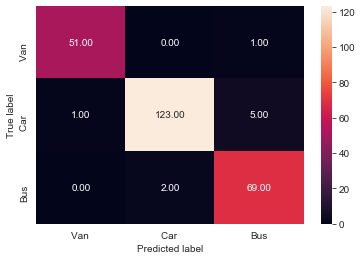

Confusion Matrix For : 
 For Reduced Dimensions Using PCA  [[ 50   0   2]
 [  2 122   5]
 [  1   4  66]]


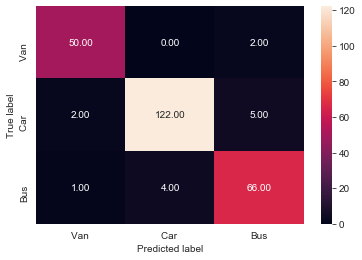

In [578]:
# Calculate Confusion Matrix & PLot To Visualize it

def draw_confmatrix(y_test, yhat, str1, str2, str3, datatype ):
    #Make predictions and evalute
    #model_pred = fit_test_model(model,X_train, y_train, X_test)
    cm = confusion_matrix( y_test, yhat, [0,1,2] )
    print("Confusion Matrix For :", "\n",datatype,cm )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [str1, str2,str3] , yticklabels = [str1, str2,str3] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    

draw_confmatrix(Orig_y_test, Orig_y_predict,"Van ", "Car ", "Bus", "Original Data Set" )

draw_confmatrix(pca_y_test, pca_y_predict,"Van ", "Car ", "Bus", "For Reduced Dimensions Using PCA ")



### Quick Comments: 

### Confusion Metric Analysis ON Original  Data: 

Confusion Matrix For : 
 Original Data Set 
 
 [[ 51   0   1]
 [  1 123   5]
 [  0   2  69]]
 
     
       - Our model on original data set has correctly classified 51 van out of 52 actuals vans and has errored only in one case where it has wrongly predicted van to be a bus.  
       - IN case of 129 actual cars our svm model has correcly classified 123 cars. it has wrongly classified 5 cars to be a bus and also 1 car to be a van
       - In case of 71 instances of actual bus , our model has correctly classified 69 buses , It has faltered in classifying wrongly 2 buses to be a car . 
       
       
### Confusion Metric Analysis ON Reduced Dimesnion After PCA : 

For Reduced Dimensions Using PCA:
 
 [[ 50   0   2]
 [  2 122   5]
 [  1   4  66]]
    
    - Out of 52 actual instances of vans our model has correctly predicted 50 vans and errored in 2 instances where it wrongly classified vans to be a bus. 
    - Out of 129 actuals cars , our mdoel has correclty classified 122 of them to be a  car and faltered in 7 cases where it wrongly classified 5 cars to a bus and 2 cars to be a van. 
    
    - Out of 71 actual bus , our model has correclty classified 66 of them to be a bus. It has faltered in 5 cases where it wrongly classified 4 bus to be a car and 1 bus to be a van.


### Approach 2:

#### Let's Perfrom The PCA and See How Our Model Perform:
When we split our data set into test train and then apply scaling.
In previous process of PCA and model performance comparison, we scaled our data before splitting them into train and test, which may have lead to some kind of data leakages. Let's see how our PCA process and model accuracy behaves when we scale our data after splitting the into train-test set 

In [579]:
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0         95.0         48.0                  83.0         178.0   
1         91.0         41.0                  84.0         141.0   
2        104.0         50.0                 106.0         209.0   
3         93.0         41.0                  82.0         159.0   
4         85.0         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                     10.0          162.0   
1                  57.0                      9.0          149.0   
2                  66.0                     10.0          207.0   
3                  63.0                      9.0          144.0   
4                 103.0                     52.0          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                      159.0   
1           45.0                    19.0                      143.0   
2           32.0                    23.0                      158.0   
3           46.0                    19.0                      143.0   
4           45.0                    19.0                      144.0   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  class  
0             187.0          197.0    2.0  
1             189.0          199.0    2.0  
2             188.0          196.0    1.0  
3             199.0          207.0    2.0  
4             180.0          183.0    0.0

In [580]:
splitscale_X = df.iloc[:,0:18].values
splitscale_y = df.iloc[:,18].values

print("Indpendent Variable X",splitscale_X )
print("Class Variable y",splitscale_y )

Indpendent Variable X [[ 95.  48.  83. ...  16. 187. 197.]
 [ 91.  41.  84. ...  14. 189. 199.]
 [104.  50. 106. ...   9. 188. 196.]
 ...
 [106.  54. 101. ...   4. 187. 201.]
 [ 86.  36.  78. ...  25. 190. 195.]
 [ 85.  36.  66. ...  18. 186. 190.]]
Class Variable y [2. 2. 1. 2. 0. 0. 0. 2. 2. 1. 2. 1. 0. 2. 0. 1. 2. 0. 1. 1. 0. 2. 0. 0.
 1. 2. 1. 1. 0. 1. 2. 1. 1. 1. 1. 2. 0. 2. 1. 0. 1. 2. 2. 1. 1. 2. 2. 0.
 2. 1. 1. 1. 1. 0. 0. 2. 1. 2. 1. 2. 1. 1. 2. 0. 0. 1. 1. 2. 0. 1. 1. 1.
 1. 2. 1. 1. 1. 0. 0. 0. 0. 2. 1. 0. 0. 2. 2. 0. 1. 1. 1. 1. 2. 0. 1. 1.
 0. 1. 0. 0. 2. 2. 2. 0. 1. 1. 0. 0. 2. 2. 1. 1. 2. 2. 1. 1. 0. 1. 2. 2.
 1. 2. 2. 0. 0. 2. 0. 1. 1. 1. 2. 1. 2. 2. 2. 1. 2. 1. 0. 1. 0. 1. 1. 2.
 0. 1. 2. 1. 0. 1. 1. 2. 0. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 2. 1.
 0. 2. 0. 2. 0. 1. 0. 0. 2. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 2. 1. 0. 1.
 0. 1. 0. 0. 0. 2. 1. 1. 1. 2. 2. 1. 0. 1. 1. 2. 0. 0. 1. 1. 1. 1. 0. 2.
 1. 2. 0. 1. 2. 1. 2. 1. 1. 2. 1. 0. 1. 2. 2. 0. 0. 1. 0. 1. 1. 0. 1. 2.
 2.

#### Let's Split Our Data Into Test & Train Data Set

In [581]:
#splitting the data in train and test sets into 70:30 Ratio

SplitScale_X_train, SplitScale_X_test, SplitScale_y_train, SplitScale_y_test = train_test_split(splitscale_X,splitscale_y, test_size = 0.3, random_state = 10)

#### Let's Apply StandardScaler to normalize our data set

In [582]:
ssx_train_sd = StandardScaler().fit_transform(SplitScale_X_train)
ssx_test_sd = StandardScaler().fit_transform(SplitScale_X_test)

print(len(ssx_train_sd))
print(len(ssx_test_sd))

587
252


### Calculating covariance matrix:
Covariance matrix should be 18*18 matrix

In [583]:
# generating the covariance matrix and the eigen values for the PCA analysis
cov_matrix_1 = np.cov(ssx_train_sd.T) # the relevanat covariance matrix
print('Covariance Matrix \n%s', (cov_matrix_1))

#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix_1)
print('Eigenvectors \n%s' %(e_vecs))
print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix 
%s [[ 1.00170648  0.68386396  0.78701988  0.69074809  0.08127467  0.1463152
   0.81119411 -0.79124332  0.8108424   0.6875776   0.75782919  0.81529405
   0.58575658 -0.25960628  0.22487804  0.15806746  0.30937139  0.37618221]
 [ 0.68386396  1.00170648  0.80354822  0.6350777   0.15401818  0.265688
   0.85282853 -0.82693467  0.8449936   0.96735081  0.7925718   0.84297296
   0.92831863  0.02574243  0.15096603 -0.03606664 -0.0923291   0.06426161]
 [ 0.78701988  0.80354822  1.00170648  0.77982209  0.15931022  0.26545848
   0.90786645 -0.91456406  0.89395859  0.79326828  0.85845943  0.8906374
   0.71902684 -0.24184604  0.10235646  0.25178656  0.16005121  0.34923172]
 [ 0.69074809  0.6350777   0.77982209  1.00170648  0.6491854   0.47445353
   0.74486291 -0.79829487  0.71698093  0.59452045  0.8125923   0.73037708
   0.55043832 -0.15052422  0.04602133  0.18901342  0.37470949  0.47507172]
 [ 0.08127467  0.15401818  0.15931022  0.6491854   1.00170648  0.69086006
   0.10135439 -0

### Sort eigenvalues in descending order

In [584]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(9.404243893839162, array([ 0.27493265,  0.29367875,  0.30437701,  0.26739067,  0.07930483,
        0.09688422,  0.31751102, -0.31399395,  0.31425429,  0.28276356,
        0.30939406,  0.31455488,  0.27219698, -0.01942018,  0.0408814 ,
        0.05948253,  0.0274544 ,  0.07161317])), (3.0152231968322356, array([ 0.12745155, -0.12384787,  0.07574846,  0.18866284,  0.11846055,
       -0.0125327 , -0.046529  , -0.0142943 , -0.05961542, -0.11480779,
       -0.06095509, -0.05191391, -0.20753261, -0.48938586,  0.05531089,
        0.12474618,  0.54159647,  0.54117069])), (1.909605610748981, array([ 0.11968789,  0.02527257,  0.05533572, -0.27680528, -0.64298766,
       -0.59096462,  0.09710819, -0.05725449,  0.10977226,  0.01737759,
       -0.05611158,  0.10885546,  0.03200592, -0.28468639,  0.11460826,
        0.07412967, -0.01151657, -0.04229588])), (1.1823812293857652, array([-0.07905419, -0.18943381,  0.07053471,  0.04234661, -0.03284857,
       -0.03370836,  0.09437995, -0.0853353 ,  0.0

In [585]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%

### Visualizing The plot : Principal Componenet Vs Explained Variance Ratio

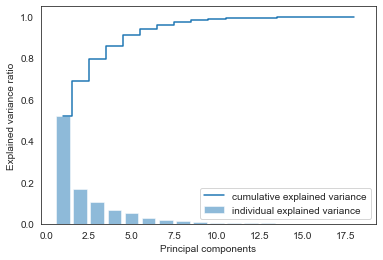

In [586]:
plt.bar(range(1,19), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,19),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [587]:
# P_reduce represents reduced mathematical space....

P_reduce_1 = np.array(eigvectors_sorted[0:8])   # Reducing from 8 to 4 dimension space

X_train_std_pca = np.dot(ssx_train_sd,P_reduce_1.T)   # projecting original data into principal component dimensions

X_test_std_pca = np.dot(ssx_test_sd,P_reduce_1.T) 
#Proj_data_df_new = pd.DataFrame(X_std_8D_1) 

print(X_train_std_pca)
print(X_test_std_pca)

Projected_df_train = pd.DataFrame(X_train_std_pca)
Projected_df_test = pd.DataFrame(X_test_std_pca)

[[-2.37320402e+00 -2.98703810e+00  5.41963894e-02 ...  1.66690865e-01
   3.60336951e-01  8.29791883e-02]
 [ 3.90463668e+00  1.08454145e+00 -3.03230432e-01 ... -1.69511485e-02
  -7.96320788e-01  1.44616542e-03]
 [ 2.71295512e+00  1.45072269e-01 -1.93602777e-01 ...  1.21928972e+00
  -3.56916508e-01 -7.74313984e-02]
 ...
 [-3.65569654e+00 -2.45694446e+00  9.53386466e-01 ...  3.14709605e-01
   8.87126208e-01  5.64273280e-01]
 [-6.70194605e-02  1.20552458e+00 -4.78145196e-01 ... -5.74487699e-01
  -1.12729562e-02  1.72105470e-01]
 [-1.00148209e+00  2.38199938e+00  7.50585548e-02 ... -1.69718797e+00
  -2.25962584e-01  4.81078676e-01]]
[[-3.6307213  -0.30297985  0.34790172 ...  0.05427198  0.13736237
  -0.87944724]
 [-3.66510681  2.2658102  -0.19113548 ...  0.59611305  1.13833767
   0.05585559]
 [-4.9301202  -2.20735664  0.5947066  ...  0.62586583 -0.04549492
   0.29366686]
 ...
 [ 4.85620468  0.03169703 -0.53774733 ... -0.2988269   0.64191823
  -0.15805202]
 [-0.36920225 -1.61990896  0.285703

### Pairplot Analysis : On Training PCA Data Set

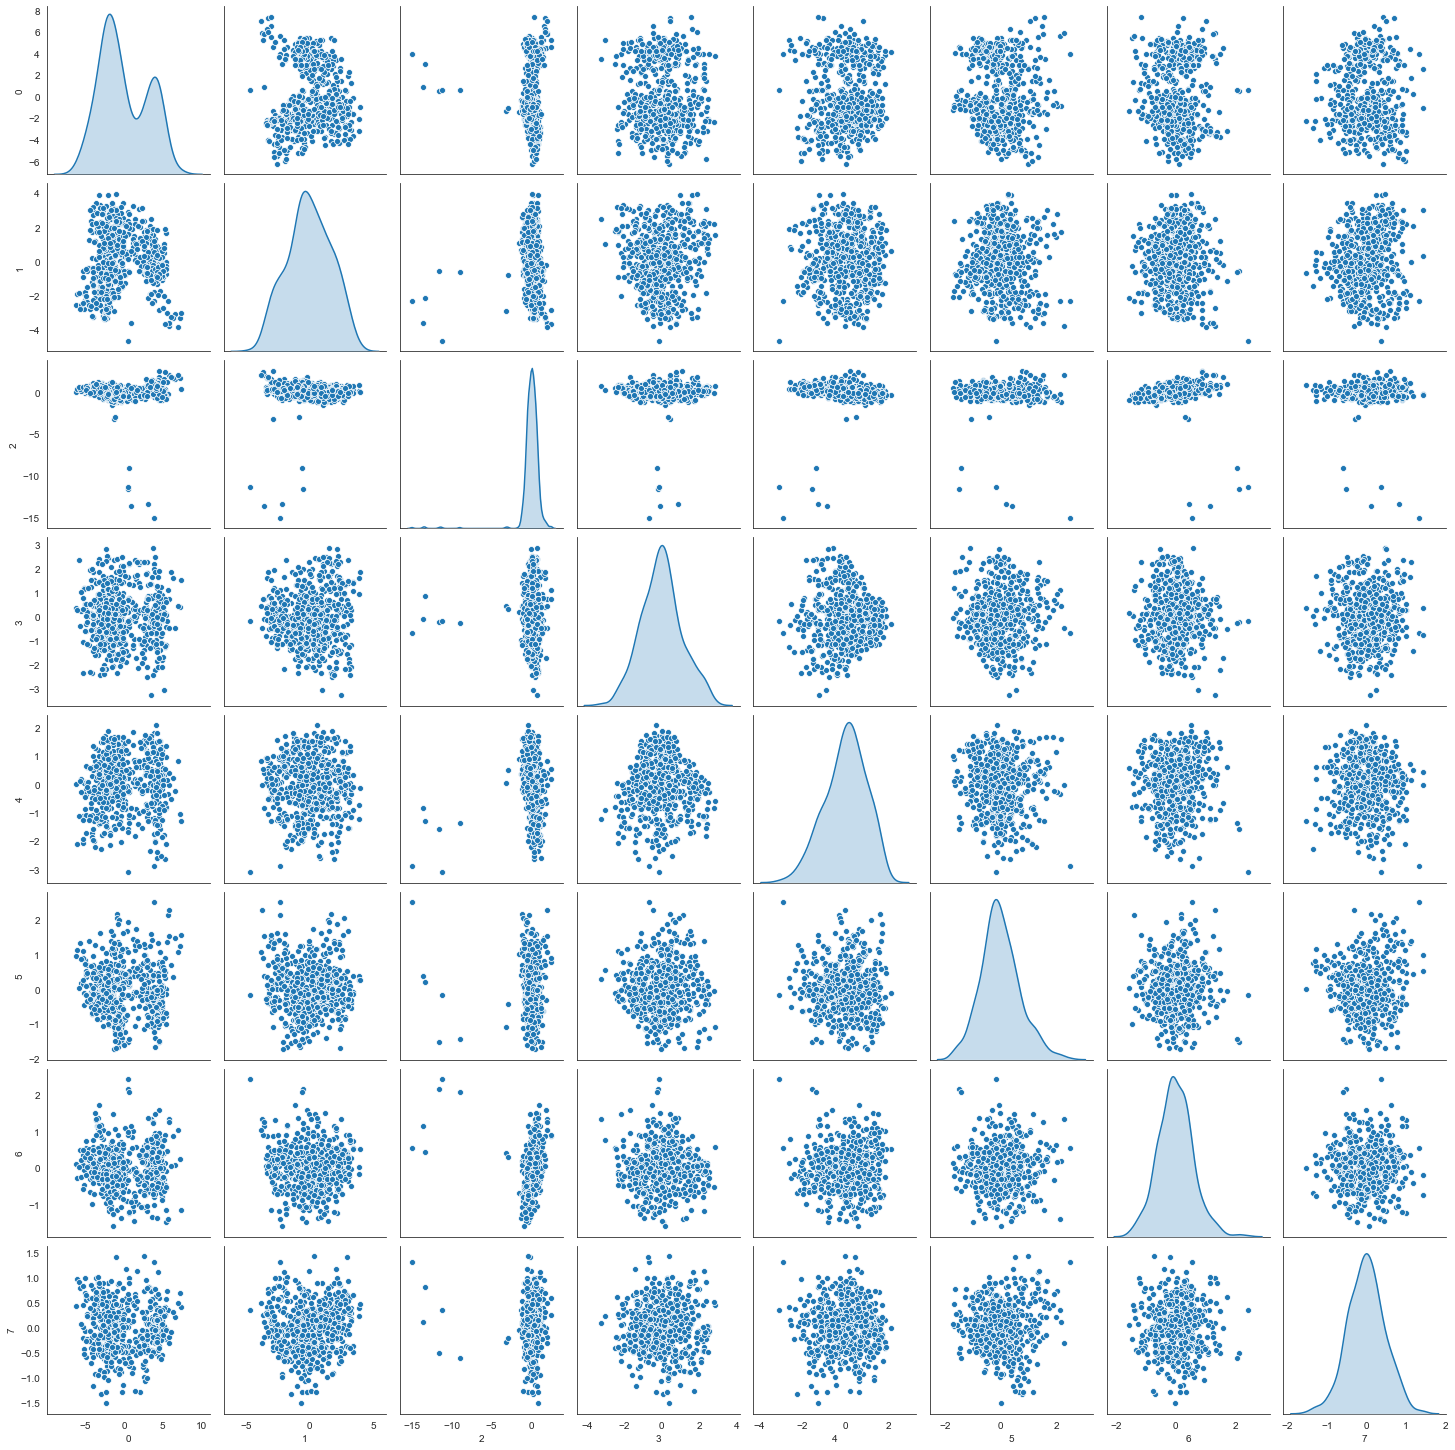

In [588]:
sns.pairplot(Projected_df_train, diag_kind='kde')
plt.show()

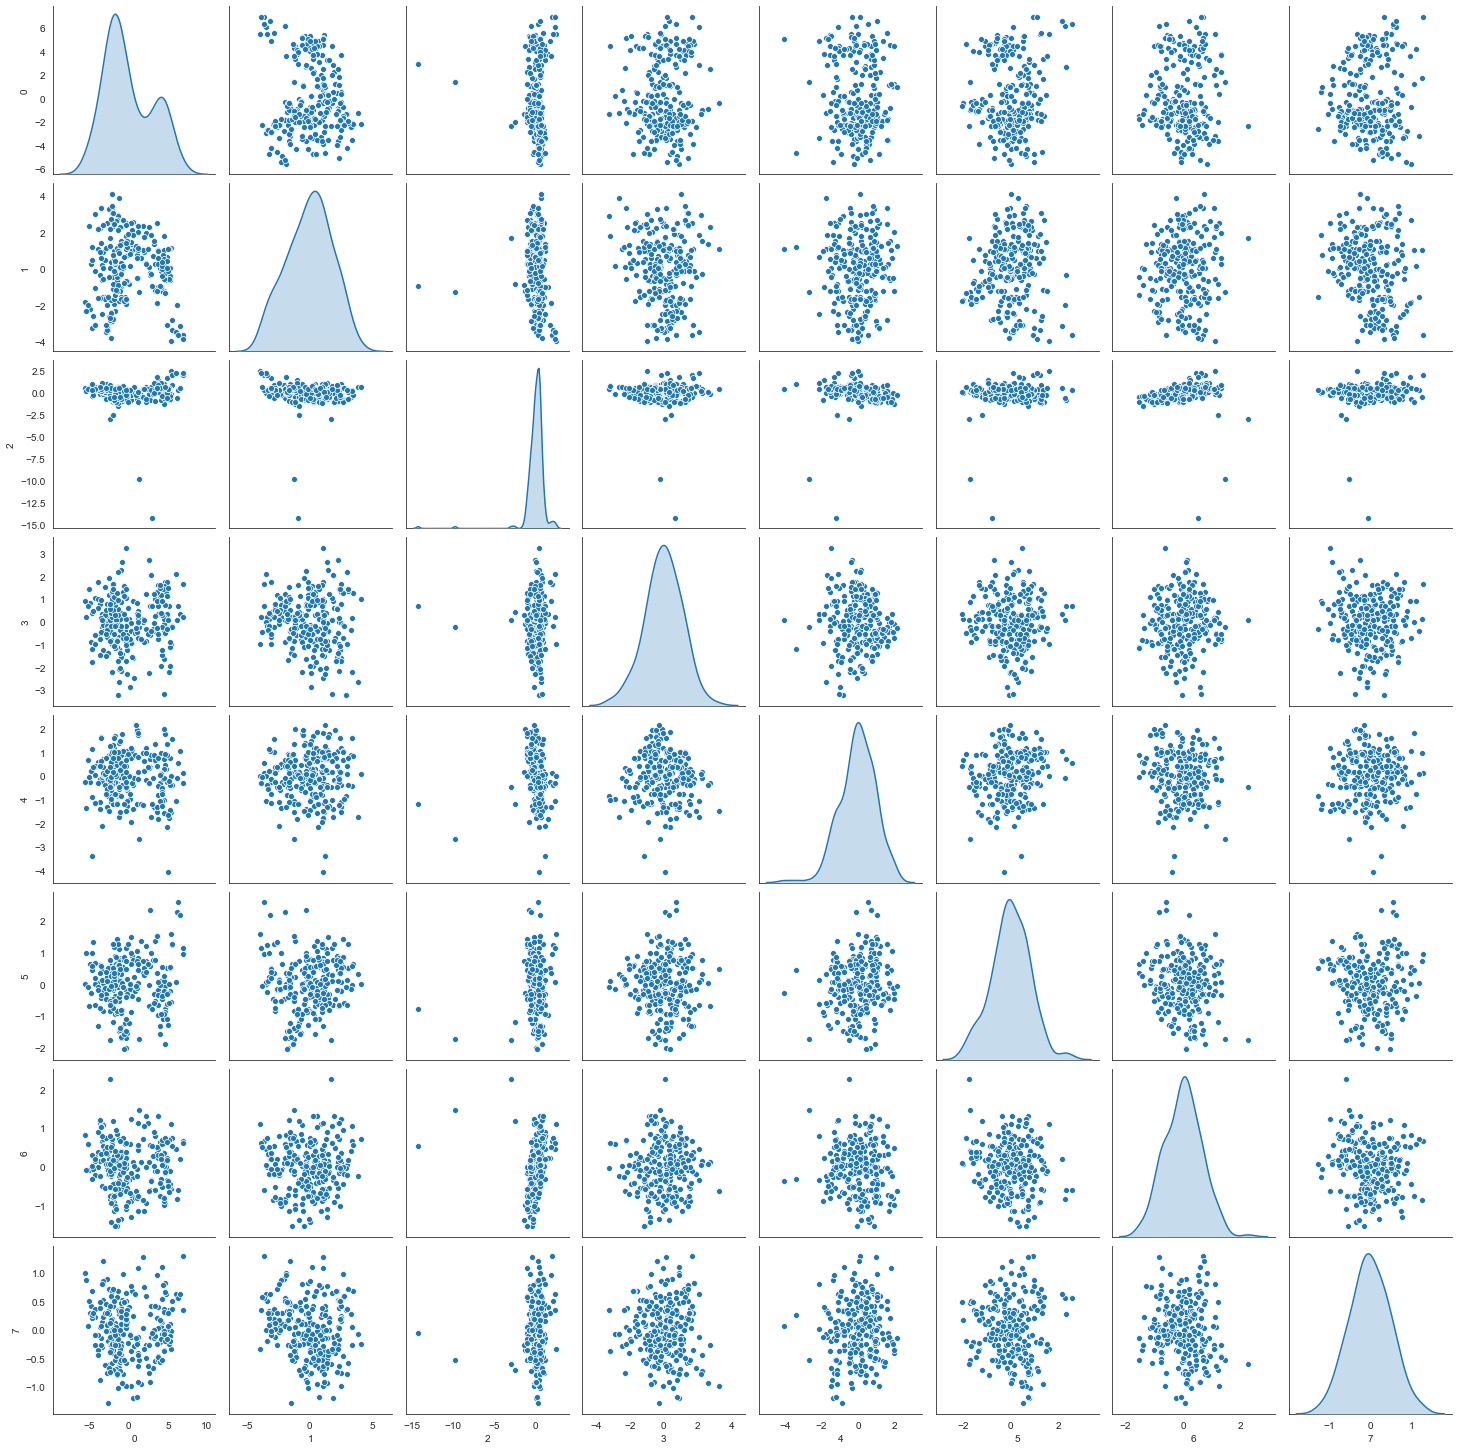

In [589]:
#pair plot for test data

sns.pairplot(Projected_df_test, diag_kind='kde')
plt.show()

### Quick Insights:
- We can see that after we performed PCA our new dataframe with reduced dimesnions has no to zero linear relationship among themseleves, which is the main objective of using PCA tool. Almost all attribures have cloud of data in the mathematical space with no clear positive or negative correlation.

In [590]:
ssx_train_sd.shape, P_reduce_1.T.shape, X_train_std_pca.shape, X_test_std_pca.shape

((587, 18), (18, 8), (587, 8), (252, 8))

In [591]:
clf1 = SVC()
clf1.fit(ssx_train_sd, SplitScale_y_train)
print ('Before PCA score', clf1.score(ssx_test_sd, SplitScale_y_test))

clf2 = SVC()
clf2.fit(X_train_std_pca, SplitScale_y_train)
print ('After PCA score', clf2.score(X_test_std_pca, SplitScale_y_test))


#print("Before PCA On Original 18 Dimension",accuracy_score(Orig_y_test,Orig_y_predict))
#print("After PCA(On 8 dimension)",accuracy_score(pca_y_test,pca_y_predict))

#predict the y value
pca_yhat_predict= clf2.predict(X_test_std_pca)

#orginal data yhat value
orig_yhat_predict = clf1.predict(ssx_test_sd)

print("Before PCA On Original 18 Dimension",accuracy_score(SplitScale_y_test,orig_yhat_predict))
print("After PCA(On 8 dimension)",accuracy_score(SplitScale_y_test,pca_yhat_predict))

Before PCA score 0.9603174603174603
After PCA score 0.9404761904761905
Before PCA On Original 18 Dimension 0.9603174603174603
After PCA(On 8 dimension) 0.9404761904761905


### Quick Observation: After we split the data set into test & train set before applying standardscaler():

   - On training data set we saw that our support vector classifier without performing PCA has an accuracy score of 96 % 
   - But when we applied the SVC model on PCA componenets(reduced dimensions) our model still performed better with 94 % with only miniscule fall in score. 
   
   - Considering that original dataframe had 18 dimensions and After PCA dimension reduced to 8, our model has fared well in terms of accuracy score. 

### Calculate Confusion Matrix & Plot To Visualize it

Confusion Matrix For : 
 Original Data Set [[ 71   1   2]
 [  1 110   4]
 [  0   2  61]]


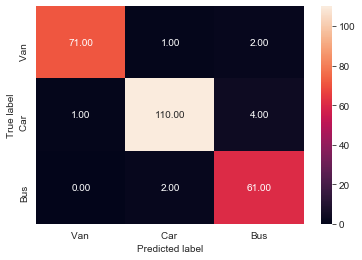

Confusion Matrix For : 
 For Reduced Dimensions Using PCA  [[ 70   2   2]
 [  2 108   5]
 [  0   4  59]]


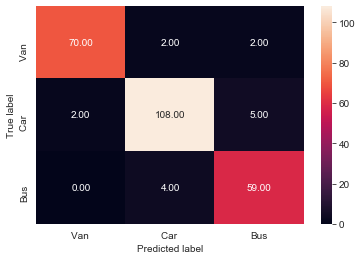

In [592]:
draw_confmatrix(SplitScale_y_test, orig_yhat_predict,"Van ", "Car ", "Bus", "Original Data Set" )

draw_confmatrix(SplitScale_y_test, pca_yhat_predict,"Van ", "Car ", "Bus", "For Reduced Dimensions Using PCA ")


### Let's Apply Grid Search & Cross-Validation:To Tune Our Model and Validate The Model's Accuracy Score

In [593]:
import itertools

def classifiers_hypertune(name,rf,param_grid,x_train_scaled,y_train,x_test_scaled,y_test,CV):
    CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=CV, verbose= 1, n_jobs =-1 )
    CV_rf.fit(x_train_scaled, y_train)
    
    y_pred_train = CV_rf.predict(x_train_scaled)
    y_pred_test = CV_rf.predict(x_test_scaled)
    
    print('Best Score: ', CV_rf.best_score_)
    print('Best Params: ', CV_rf.best_params_)
 
    #Confusion Matrix for test data
    draw_confmatrix(y_test, y_pred_test,"Van", "Car", "Bus", "Original Data Set" )
    print("SVM Accuracy Score:",round(accuracy_score(y_test, y_pred_test),2)*100)
    

In [594]:

#Training on SVM Classifier
from sklearn.model_selection import GridSearchCV
svmc = SVC()

#Let's See What all parameters one can tweak 
print("SVM Parameters:", svmc.get_params())

# Create the parameter grid based on the results of random search 
param_grid = [
  {'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear']},
  {'C': [0.01, 0.05, 0.5, 1],  'kernel': ['rbf']},
 ]

param_grid_1 = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

SVM Parameters: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


### Hypertuning SVM using hyper Parameters:

#### Iteration 1:

#### In Case Of PCA:


Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    2.6s finished


Best Score:  0.9455873758036235
Best Params:  {'C': 1, 'kernel': 'rbf'}
Confusion Matrix For : 
 Original Data Set [[ 70   2   2]
 [  2 108   5]
 [  0   4  59]]


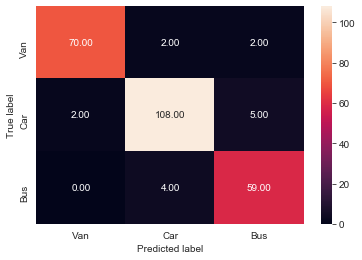

SVM Accuracy Score: 94.0


In [595]:
classifiers_hypertune("Support Vector Classifier", svmc, param_grid,X_train_std_pca, SplitScale_y_train, X_test_std_pca, SplitScale_y_test,10)

### Quick Insight: 

### Hyper tuning of Model on PCA Data Set: 

   - We generally tune some of the important hyperparameters of the model which are not the model parameter. like here we played with C value : penalty and the type of kernel : rbf/liner  
   
   - GridSearchCV get's the best paramter from the array of parameters and find the best model and score for us. 
   - Here on perfroming gridsearch hyper tuning of SVM model we got the best parameter to  be 
    : Best Score:  0.9455873758036235

    : Best Params:  {'C': 1, 'kernel': 'rbf'}
    : Accruacy Score : 94 % which seems to be similar to than what we measured earlier in our appraoch 2
    
    - We can further play with hyper parameters and see if it helps to score our model better. 

#### For Original Data Set:

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.6s finished


Best Score:  0.9592051431911163
Best Params:  {'C': 1, 'kernel': 'rbf'}
Confusion Matrix For : 
 Original Data Set [[ 71   1   2]
 [  1 110   4]
 [  0   2  61]]


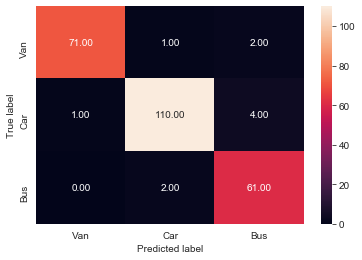

SVM Accuracy Score: 96.0


In [596]:
classifiers_hypertune("Support Vector Classifier", svmc, param_grid,ssx_train_sd, SplitScale_y_train, ssx_test_sd, SplitScale_y_test,10)

#### On Orginal Data Set:
When we apploed GridSearchCV on Our model which is using orginal data set, we saw
Best Score: 0.9592051431911163
Best Params: {'C': 1, 'kernel': 'rbf'}
Accuracy Score : We saw an improvement in accuracy score to 96 % which is better than what we observed in approach 2 and approach 1

#### Let's further tweak the parameters to see if we can improve our model accuracy :

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   22.6s finished


Best Score:  0.9285797779076563
Best Params:  {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
Confusion Matrix For : 
 Original Data Set [[ 69   3   2]
 [  7 105   3]
 [  0   2  61]]


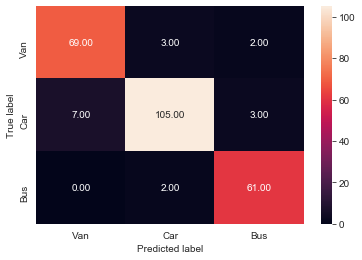

SVM Accuracy Score: 93.0


In [597]:
classifiers_hypertune("Support Vector Classifier_iterarion2", svmc, param_grid_1,X_train_std_pca, SplitScale_y_train, X_test_std_pca, SplitScale_y_test,10)

#### Iteration 2 : On original Data Set

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    2.1s finished


Best Score:  0.972822910578609
Best Params:  {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
Confusion Matrix For : 
 Original Data Set [[ 72   0   2]
 [  0 115   0]
 [  0   3  60]]


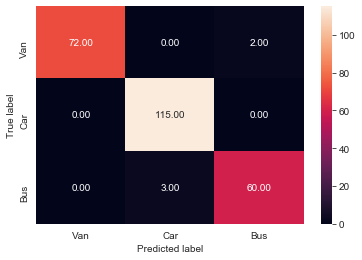

SVM Accuracy Score: 98.0


In [598]:
classifiers_hypertune("Support Vector Classifier", svmc, param_grid_1,ssx_train_sd, SplitScale_y_train, ssx_test_sd, SplitScale_y_test,10)

### We can see a slight improvement in best model which was picked by our gridsearchcv method: 97.28 % and also we saw a slight increase in model accuracy score : 98 %

#### Let's Look How Some Other Classifier Models Perform Bith On Original Data & PCA treated data sets

#### Logistic Regression

In [599]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(ssx_train_sd, SplitScale_y_train)
print ('Before PCA score', model.score(ssx_test_sd, SplitScale_y_test))

model.fit(X_train_std_pca, SplitScale_y_train)
print ('After PCA score', model.score(X_test_std_pca, SplitScale_y_test))



Before PCA score 0.9523809523809523
After PCA score 0.8015873015873016


#### Naive Bayes

In [600]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(ssx_train_sd, SplitScale_y_train)
print ('Before PCA score', nb.score(ssx_test_sd, SplitScale_y_test))

nb.fit(X_train_std_pca, SplitScale_y_train)
print ('After PCA score', nb.score(X_test_std_pca, SplitScale_y_test))


Before PCA score 0.5833333333333334
After PCA score 0.7738095238095238


#### Decision Tree Classifier

In [601]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy' )

dt_model.fit(ssx_train_sd, SplitScale_y_train)
print ('Before PCA score', dt_model.score(ssx_test_sd, SplitScale_y_test))

dt_model.fit(X_train_std_pca, SplitScale_y_train)
print ('After PCA score', dt_model.score(X_test_std_pca, SplitScale_y_test))


Before PCA score 0.9166666666666666
After PCA score 0.8055555555555556


### It Seems that Support Vectore Classifier is a better model to classifiy the given silhoutte info as van, bus, car .